#Superstore EDA Final: Exploratory Data Analysis & Preparation

by Limamu Mohammed

`About this Data Set`

`Summary`

This dataset contains sales transactions from a global superstore, covering multiple years and regions. It includes information on customer demographics, product categories, sales, profits, and shipping details, providing valuable insights into retail trends and business performance.

`Data Source`

Global Superstore Dataset

`Description`


"This dataset contains transactional data from a large retail superstore. It includes details about orders, customers, product categories, sales, profits, shipping times, and more. The data spans multiple years and provides an opportunity for in-depth exploratory data analysis (EDA) to uncover patterns in sales, customer behavior, and operational efficiency."

"The dataset can be used for various analytical purposes, such as identifying top-performing products, analyzing regional sales trends, and optimizing shipping strategies."

`Files`

`A single Excel file containing multiple sheets:`

`Orders Sheet`: Detailed transaction data, including customer, product, and sales information.

`Data Dictionary`

`Each record represents an individual order transaction.`

Order ID – Unique identifier for each order

Order Date – Date when the order was placed

Ship Date – Date when the order was shipped

Customer ID – Unique identifier for each customer

Customer Name – Name of the customer

Segment – Customer category (e.g., Consumer, Corporate, Home Office)

City – City where the order was placed

State – State where the order was placed

Region – Geographic region of the order

Category – Broad product category (e.g., Furniture, Office Supplies, Technology)

Sub-Category – More specific product classification

Product Name – Name of the product ordered

Sales – Sales revenue from the order

Quantity – Number of units sold

Discount – Discount applied to the order

Profit – Profit earned from the order

Ship Mode – Shipping method used (e.g., Standard Class, Second Class, Same Day)






#Import libraries and Set Notebook Defaults

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Libraries & Setting Defaults
#This section loads essential Python libraries for data analysis and visualization.

In [2]:
# Display all dataframe Columns
pd.set_option('display.max_columns', None)



In [3]:
# Connect to google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_excel('/content/drive/MyDrive/DESCRIPTIVE ANALYTICS 25 Lee/Lees Python Foundations/SupStoreEDA/SupStoreData/Global_Superstore_Orders_2012_2015.xlsx')
df['Postal Code'] = df['Postal Code'].replace('00nan', 'na')

# Data Cleaning & Preprocessing
Cleaning missing values and fixing inconsistent data.

In [68]:
df['Postal Code'] = df['Postal Code'].replace('00nan', 'na')

In [70]:
# Replacing invalid postal codes with 'NA' for consistency
df['Postal Code'] = df['Postal Code'].replace('00nan', 'NA')

#Experimenting


In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,NaN,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2012-AT73557-40909,2012-01-01,2012-01-05,Second Class,AT-73557,Annie Thurman,Consumer,NaN,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2012-EM14140124-40909,2012-01-01,2012-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,NaN,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [6]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,47594,MO-2015-LP709586-42369,2015-12-31,2016-01-05,Standard Class,LP-709586,Liz Preis,Consumer,NaN,Agadir,Souss-Massa-Draâ,Morocco,North Africa,Africa,OFF-BI-6397,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1,0.0,0.42,1.490,Medium
51286,27700,IN-2015-KM1622527-42369,2015-12-31,2016-01-07,Standard Class,KM-1622527,Kalyca Meade,Corporate,NaN,Shantou,Guangdong,China,Eastern Asia,Asia Pacific,OFF-PA-4002,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.47,3,0.0,25.38,1.410,Medium
51287,8857,MX-2015-CM1219093-42369,2015-12-31,2016-01-02,Second Class,CM-1219093,Charlotte Melton,Consumer,NaN,Managua,Managua,Nicaragua,Central America,LATAM,OFF-LA-4637,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40,3,0.0,12.36,1.350,Medium
51288,2143,MX-2015-JB1604582-42369,2015-12-31,2016-01-04,Standard Class,JB-1604582,Julia Barnett,Home Office,NaN,Reynosa,Tamaulipas,Mexico,Central America,LATAM,OFF-LA-5388,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.74,3,0.0,0.66,1.324,Medium
51289,6852,MX-2015-TD2099582-42369,2015-12-31,2016-01-06,Standard Class,TD-2099582,Tamara Dahlen,Consumer,NaN,Juárez,Chihuahua,Mexico,Central America,LATAM,OFF-LA-4664,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.12,1,0.0,0.56,1.199,Medium


In [7]:
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
24686,44597,IR-2014-BS166560-41807,2014-06-17,2014-06-18,First Class,BS-166560,Brian Stugart,Consumer,NaN,Khorramabad,Lorestan,Iran,Southern Asia,Asia Pacific,OFF-ST-5700,Office Supplies,Storage,"Rogers Lockers, Blue",2962.68,14,0.0,207.06,325.930,Medium
36991,9632,MX-2015-MK1790582-42109,2015-04-15,2015-04-21,Standard Class,MK-1790582,Michael Kennedy,Corporate,NaN,Tlalnepantla,México,Mexico,Central America,LATAM,OFF-BI-3725,Office Supplies,Binders,"Cardinal Binding Machine, Durable",102.54,3,0.0,13.32,7.982,Medium
25302,12409,ES-2014-EB13975139-41818,2014-06-28,2014-07-04,Standard Class,EB-13975139,Erica Bern,Corporate,NaN,Swansea,Wales,United Kingdom,Northern Europe,Europe,OFF-AP-3571,Office Supplies,Appliances,"Breville Microwave, Red",905.13,3,0.0,81.45,183.080,Low
3021,19339,ES-2012-JD16015120-41077,2012-06-17,2012-06-24,Standard Class,JD-16015120,Joy Daniels,Consumer,NaN,Valladolid,Castile and León,Spain,Southern Europe,Europe,OFF-ST-5709,Office Supplies,Storage,"Rogers Trays, Blue",277.56,5,0.1,61.56,37.050,Low
44577,4868,MX-2015-FO1430582-42265,2015-09-18,2015-09-21,Second Class,FO-1430582,Frank Olsen,Consumer,NaN,Poza Rica de Hidalgo,Veracruz,Mexico,Central America,LATAM,OFF-AR-5910,Office Supplies,Art,"Sanford Highlighters, Blue",42.00,4,0.0,15.52,4.281,Medium


In [8]:
df.shape

(51290, 24)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

## Examine __`Postal Code`__ Nulls and Data Type

In [10]:
df['Postal Code'].isnull().sum()

41296

In [11]:
df['Postal Code'].notnull().sum()

9994

In [12]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,NaN,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium


In [13]:
# Re-Read original Data into new dataframe
# Specify object data type for postal code
df1 = pd.read_excel('/content/drive/MyDrive/DESCRIPTIVE ANALYTICS 25 Lee/Lees Python Foundations/SupStoreEDA/SupStoreData/Global_Superstore_Orders_2012_2015.xlsx', dtype={'Postal Code': 'object'})
df1.sample(30)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
7092,50910,TU-2012-VS11820134-41224,2012-11-11,2012-11-13,Second Class,VS-11820134,Vivek Sundaresam,Consumer,NaN,Antalya,Antalya,Turkey,Western Asia,Asia Pacific,OFF-EN-4911,Office Supplies,Envelopes,"Jiffy Interoffice Envelope, Security-Tint",39.0720,2,0.60,-44.9880,5.540,High
47987,39982,CA-2015-PW19030140-42323,2015-11-15,2015-11-19,Second Class,PW-190301406,Pauline Webber,Corporate,13601,Watertown,New York,United States,Eastern US,USCA,OFF-ST-5079,Office Supplies,Storage,"Letter/Legal File Tote with Clear Snap-On Lid,...",96.3600,6,0.00,25.0536,10.100,High
43349,28572,IN-2015-PB192107-42248,2015-09-01,2015-09-04,First Class,PB-192107,Phillip Breyer,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,OFF-AP-4738,Office Supplies,Appliances,"Hoover Refrigerator, White",1887.8400,4,0.10,0.0000,241.890,Medium
8106,37297,US-2012-SH19975140-41252,2012-12-09,2012-12-13,Standard Class,SH-199751404,Sally Hughsby,Corporate,83605,Caldwell,Idaho,United States,Western US,USCA,OFF-PA-6604,Office Supplies,Paper,"Xerox Color Copier Paper, 11"" x 17"", Ream",91.3600,4,0.00,42.0256,8.970,Medium
14781,38094,CA-2013-MC18100140-41511,2013-08-25,2013-08-25,Same Day,MC-181001402,Mick Crebagga,Consumer,77041,Houston,Texas,United States,Central US,USCA,OFF-BI-5618,Office Supplies,Binders,Poly Designer Cover & Back,3.7980,1,0.80,-6.0768,1.680,High
18876,39845,CA-2013-GB14530140-41613,2013-12-05,2013-12-10,Standard Class,GB-145301404,George Bell,Corporate,90049,Los Angeles,California,United States,Western US,USCA,OFF-LA-3207,Office Supplies,Labels,Avery 488,12.6000,4,0.00,6.0480,1.480,Medium
12716,46426,SF-2013-DV3045117-41441,2013-06-16,2013-06-22,Standard Class,DV-3045117,Darrin Van Huff,Corporate,NaN,Johannesburg,Gauteng,South Africa,Southern Africa,Africa,OFF-AR-6118,Office Supplies,Art,"Stanley Pencil Sharpener, Easy-Erase",52.0800,2,0.00,17.7000,3.110,Medium
30718,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.9600,8,0.00,311.5200,903.040,Critical
45546,34488,CA-2015-RW19630140-42280,2015-10-03,2015-10-09,Standard Class,RW-196301406,Rob Williams,Corporate,10035,New York City,New York,United States,Eastern US,USCA,TEC-PH-5599,Technology,Phones,Plantronics 81402,65.9900,1,0.00,17.1574,7.890,Low
7242,25852,IN-2012-AS1013527-41229,2012-11-16,2012-11-22,Standard Class,AS-1013527,Adrian Shami,Home Office,NaN,Nanning,Guangxi,China,Eastern Asia,Asia Pacific,OFF-SU-3001,Office Supplies,Supplies,"Acme Trimmer, Easy Grip",92.4000,2,0.00,5.5200,1.640,Medium


In [14]:
df['Postal Code'] = df['Postal Code'].replace('00nan', 'na')


In [15]:
path = '/content/drive/MyDrive/DESCRIPTIVE ANALYTICS 25 Lee/Lees Python Foundations/SupStoreEDA/SupStoreData/Global_Superstore_Orders_2012_2015.xlsx'

# Read the data into df1 and specify an object data type for postal code
df1 = pd.read_excel(path, dtype={'Postal Code': 'object'})

# Replace '00nan' with 'na' in the 'Postal Code' column
# df1['Postal Code'] = df1['Postal Code'].replace('00nan', 'na')

df1.sample(30)



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
40301,41233,CA-2015-SC20575140-42180,2015-06-25,2015-06-29,Standard Class,SC-205751406,Sonia Cooley,Consumer,2920,Cranston,Rhode Island,United States,Eastern US,USCA,OFF-BI-4358,Office Supplies,Binders,GBC Prestige Therm-A-Bind Covers,102.9300,3,0.00,48.3771,10.460,Medium
8414,41861,KZ-2012-LS723068-41261,2012-12-18,2012-12-20,First Class,LS-723068,Lycoris Saunders,Consumer,NaN,Kokshetau,Aqmola,Kazakhstan,Central Asia,Asia Pacific,OFF-EN-4445,Office Supplies,Envelopes,"GlobeWeis Mailers, Set of 50",11.5650,1,0.70,-26.6250,3.650,High
17047,39378,CA-2013-KH16690140-41573,2013-10-26,2013-11-01,Standard Class,KH-166901404,Kristen Hastings,Corporate,97477,Springfield,Oregon,United States,Western US,USCA,OFF-PA-6466,Office Supplies,Paper,Xerox 1914,131.9040,3,0.20,47.8152,12.910,Medium
42084,19930,ES-2015-BE1141048-42224,2015-08-08,2015-08-10,Second Class,BE-1141048,Bobby Elias,Consumer,NaN,Wiesbaden,Hesse,Germany,Western Europe,Europe,OFF-ST-6068,Office Supplies,Storage,"Smead Trays, Wire Frame",128.3850,3,0.10,4.2750,27.240,Critical
34037,24504,IN-2015-ME177257-42015,2015-01-11,2015-01-15,Standard Class,ME-177257,Max Engle,Consumer,NaN,Hobart,Tasmania,Australia,Oceania,Asia Pacific,FUR-CH-5369,Furniture,Chairs,"Novimex Bag Chairs, Set of Two",57.8520,2,0.40,-6.7680,3.480,High
11307,9221,MX-2013-JH1582082-41395,2013-05-01,2013-05-07,Standard Class,JH-1582082,John Huston,Consumer,NaN,Guadalajara,Jalisco,Mexico,Central America,LATAM,OFF-FA-2940,Office Supplies,Fasteners,"Accos Clamps, 12 Pack",25.0800,2,0.00,2.7200,2.335,Low
44302,10631,ES-2015-GW1460545-42262,2015-09-15,2015-09-21,Standard Class,GW-1460545,Giulietta Weimer,Consumer,NaN,Coulommiers,Ile-de-France,France,Western Europe,Europe,OFF-BI-3720,Office Supplies,Binders,"Cardinal Binder, Clear",53.1600,4,0.00,1.5600,3.730,Low
24081,8547,MX-2014-ML1775593-41795,2014-06-05,2014-06-05,Same Day,ML-1775593,Max Ludwig,Home Office,NaN,Managua,Managua,Nicaragua,Central America,LATAM,OFF-AR-5923,Office Supplies,Art,"Sanford Pencil Sharpener, Water Color",38.6800,2,0.00,11.2000,6.900,Critical
29184,6718,MX-2014-JK1537082-41907,2014-09-25,2014-09-29,Standard Class,JK-1537082,Jay Kimmel,Consumer,NaN,Juárez,Chihuahua,Mexico,Central America,LATAM,FUR-CH-5439,Furniture,Chairs,"Office Star Chairmat, Red",35.1040,1,0.20,-3.0760,2.398,Medium
9700,5222,MX-2013-AG1027018-41317,2013-02-12,2013-02-17,Second Class,AG-1027018,Alejandro Grove,Consumer,NaN,Porto Alegre,Rio Grande do Sul,Brazil,South America,LATAM,FUR-FU-5726,Furniture,Furnishings,"Rubbermaid Door Stop, Erganomic",254.5200,9,0.00,114.4800,38.589,High


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [17]:
df1['Postal Code'] = df1['Postal Code'].astype('str')
df1['Postal Code'].sort_values()

,Postal Code
22218,05408
34290,05408
17508,05408
34289,05408
49612,05408
...,...
19154,nan
19155,nan
19157,nan
19131,nan


In [18]:
# Ensure all values contain at least 5 characters and fill with leading zeroes
df1['Postal Code'] = df1['Postal Code'].astype('str').str.zfill(5)

# View Massachusetts Postal Codes
columns = ['Country', 'State', 'City', 'Postal Code']
mask = df1['State'] == 'Massachusetts'
df1[columns].loc[mask].sort_values('Postal Code').head(30)

,Country,State,City,Postal Code
13405,United States,Massachusetts,Holyoke,01040
18442,United States,Massachusetts,Leominster,01453
9923,United States,Massachusetts,Leominster,01453
9922,United States,Massachusetts,Leominster,01453
18443,United States,Massachusetts,Leominster,01453
18444,United States,Massachusetts,Leominster,01453
18445,United States,Massachusetts,Leominster,01453
28717,United States,Massachusetts,Marlborough,01752
28718,United States,Massachusetts,Marlborough,01752
21495,United States,Massachusetts,Andover,01810


In [19]:
# Sample all Postal Codes
df1['Postal Code'].sample(30)

,Postal Code
1991,00nan
40782,00nan
51055,00nan
23286,00nan
21896,00nan
34191,00nan
22453,22304
34410,60623
48131,10011
19724,00nan


In [20]:
# Replace '00nan' with 'na'
df1['Postal Code'] = df1['Postal Code'].replace('00nan', 'na')
df1['Postal Code'].sample(30)

,Postal Code
27206,na
11189,na
1309,11561
8655,90045
10973,na
25602,na
36638,na
4733,na
30919,na
14852,90049


In [21]:
# Get value_counts for Postal code and sort by postal code
df1['Postal Code'].value_counts().sort_index()

,count
Postal Code,
01040,1
01453,6
01752,2
01810,4
01841,33
...,...
98632,3
98661,5
99207,7


In [22]:
# View location fields sorted by postal codes
columns = ['Country', 'State', 'City', 'Postal Code']
df1[columns].sort_values('Postal Code').head(30)

,Country,State,City,Postal Code
13405,United States,Massachusetts,Holyoke,01040
18443,United States,Massachusetts,Leominster,01453
9923,United States,Massachusetts,Leominster,01453
9922,United States,Massachusetts,Leominster,01453
18444,United States,Massachusetts,Leominster,01453
18445,United States,Massachusetts,Leominster,01453
18442,United States,Massachusetts,Leominster,01453
28717,United States,Massachusetts,Marlborough,01752
28718,United States,Massachusetts,Marlborough,01752
21493,United States,Massachusetts,Andover,01810


In [23]:
# View location fields sorted by postal codes
columns = ['Country', 'State', 'City', 'Postal Code']
df1[columns].sort_values('Postal Code').tail(30)

,Country,State,City,Postal Code
19186,Cameroon,Centre,Yaounde,na
19187,Brazil,São Paulo,Sorocaba,na
19188,Cameroon,Centre,Yaounde,na
19189,Colombia,Atlántico,Barranquilla,na
19190,Cameroon,Centre,Yaounde,na
19182,Cameroon,Centre,Yaounde,na
19162,France,Provence-Alpes-Côte d'Azur,Marseille,na
19159,Norway,Hedmark,Hamar,na
19158,India,Karnataka,Belgaum,na
19133,Honduras,Cortés,Choloma,na


# Reading Excel Data Sheet


In [24]:
# OG Read from Excel
#df = pd.read_excel('/content/drive/MyDrive/DESCRIPTIVE ANALYTICS 25 Lee/Lees Python Foundations/SupStoreEDA/SupStoreData/Global_Superstore_Orders_2012_2015.xlsx')
#df.head()

In [25]:
# New Excel Read
# Postal ( Replace nulls with na)

# Set file path as varible
path = '/content/drive/MyDrive/DESCRIPTIVE ANALYTICS 25 Lee/Lees Python Foundations/SupStoreEDA/SupStoreData/Global_Superstore_Orders_2012_2015.xlsx'

# Read Data into df and specify object data type for postal code
df = pd.read_excel(path, dtype={'Postal Code': 'object'})

# Ensure all Postal Code values contain at least 5 characters and fill with leading zeroes
df['Postal Code'] = df['Postal Code'].astype('str').str.zfill(5)

# Replace '00nan' with 'na'
df['Postal Code'] = df['Postal Code'].replace('00nan', 'na')

# View sample of data
df.sample(30)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
11205,11107,IT-2013-JK1609048-41391,2013-04-27,2013-05-02,Standard Class,JK-1609048,Juliana Krohn,Consumer,na,Chemnitz,Saxony,Germany,Western Europe,Europe,OFF-SU-6168,Office Supplies,Supplies,"Stiletto Ruler, Easy Grip",82.5000,5,0.000,33.7500,4.090,Medium
7087,36847,US-2012-DB12970140-41224,2012-11-11,2012-11-15,Standard Class,DB-129701402,Darren Budd,Corporate,77036,Houston,Texas,United States,Central US,USCA,OFF-AR-3276,Office Supplies,Art,Avery Fluorescent Highlighter Four-Color Set,2.6720,1,0.200,0.3340,1.070,Medium
50776,50694,QA-2015-LM7065105-42362,2015-12-24,2015-12-28,Standard Class,LM-7065105,Liz MacKendrick,Consumer,na,Doha,Ad Dawhah,Qatar,Western Asia,Asia Pacific,OFF-BI-3738,Office Supplies,Binders,"Cardinal Index Tab, Durable",7.6200,1,0.000,3.4200,1.110,High
34378,26016,IN-2015-TM2149058-42026,2015-01-22,2015-01-26,Standard Class,TM-2149058,Tony Molinari,Consumer,na,Durgapur,Maharashtra,India,Southern Asia,Asia Pacific,OFF-AR-3532,Office Supplies,Art,"Boston Highlighters, Easy-Erase",57.4200,3,0.000,11.4300,3.840,Medium
18173,41742,NG-2013-BO135094-41598,2013-11-20,2013-11-24,Second Class,BO-135094,Bill Overfelt,Corporate,na,Niamey,Niamey,Niger,Western Africa,Africa,OFF-ST-6048,Office Supplies,Storage,"Smead Lockers, Single Width",198.4500,1,0.000,89.2800,15.370,Medium
27630,34641,CA-2014-TB21055140-41879,2014-08-28,2014-09-02,Second Class,TB-210551406,Ted Butterfield,Consumer,02169,Quincy,Massachusetts,United States,Eastern US,USCA,OFF-PA-6084,Office Supplies,Paper,Southworth 25% Cotton Linen-Finish Paper & Env...,81.5400,9,0.000,36.6930,6.430,Medium
2644,11110,ES-2012-DB13210139-41065,2012-06-05,2012-06-12,Standard Class,DB-13210139,Dean Braden,Consumer,na,Colchester,England,United Kingdom,Northern Europe,Europe,OFF-PA-5851,Office Supplies,Paper,"SanDisk Computer Printout Paper, 8.5 x 11",237.5100,7,0.000,26.0400,12.450,Medium
19983,49178,HU-2014-JR567057-41640,2014-01-01,2014-01-05,Standard Class,JR-567057,Jim Radford,Consumer,na,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-BI-4829,Office Supplies,Binders,"Ibico Index Tab, Durable",9.2700,1,0.000,4.0500,1.260,Medium
1233,7459,MX-2012-MC1763582-40992,2012-03-24,2012-03-28,Standard Class,MC-1763582,Matthew Clasen,Corporate,na,Mexico City,Distrito Federal,Mexico,Central America,LATAM,OFF-ST-6040,Office Supplies,Storage,"Smead Folders, Single Width",46.7200,4,0.000,21.9200,2.648,Medium
10670,46536,YM-2013-CK2205145-41367,2013-04-03,2013-04-07,Standard Class,CK-2205145,Chloris Kastensmidt,Consumer,na,Taizz,Ta'izz,Yemen,Western Asia,Asia Pacific,OFF-EN-4444,Office Supplies,Envelopes,"GlobeWeis Mailers, Security-Tint",12.2850,1,0.700,-12.7050,1.910,High


In [26]:
# View location fields sorted by postal code
columns = ['Country', 'State', 'City', 'Postal Code']
df[columns].sort_values('Postal Code').head(30)

,Country,State,City,Postal Code
13405,United States,Massachusetts,Holyoke,01040
18443,United States,Massachusetts,Leominster,01453
9923,United States,Massachusetts,Leominster,01453
9922,United States,Massachusetts,Leominster,01453
18444,United States,Massachusetts,Leominster,01453
18445,United States,Massachusetts,Leominster,01453
18442,United States,Massachusetts,Leominster,01453
28717,United States,Massachusetts,Marlborough,01752
28718,United States,Massachusetts,Marlborough,01752
21493,United States,Massachusetts,Andover,01810


In [27]:
# New read from Excel
path = '/content/drive/MyDrive/DESCRIPTIVE ANALYTICS 25 Lee/Lees Python Foundations/SupStoreEDA/SupStoreData/Global_Superstore_Orders_2012_2015.xlsx'
df = pd.read_excel(path, dtype={'Postal Code': 'object'})
df['Postal Code'] = df['Postal Code'].astype('str').str.zfill(5)
df['Postal Code'] = df['Postal Code'].replace('00nan', 'na')


df.sample(30)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
36918,35648,US-2015-JL15130140-42106,2015-04-12,2015-04-16,Standard Class,JL-151301406,Jack Lebron,Consumer,43130,Lancaster,Ohio,United States,Eastern US,USCA,TEC-AC-4946,Technology,Accessories,Kingston Digital DataTraveler 32GB USB 2.0,27.1200,2,0.20,-4.7460,2.030,High
25608,12121,ES-2014-SP2092064-41828,2014-07-08,2014-07-11,First Class,SP-2092064,Susan Pistek,Consumer,na,Bologna,Emilia-Romagna,Italy,Southern Europe,Europe,OFF-AP-4743,Office Supplies,Appliances,"Hoover Stove, Red",3979.2900,7,0.00,1989.5400,240.170,Medium
39767,25665,IN-2015-MB180857-42172,2015-06-17,2015-06-23,Standard Class,MB-180857,Mick Brown,Consumer,na,Brisbane,Queensland,Australia,Oceania,Asia Pacific,OFF-AR-5910,Office Supplies,Art,"Sanford Highlighters, Blue",42.5250,3,0.10,9.4050,1.840,Medium
47444,41338,NI-2015-DW354095-42315,2015-11-07,2015-11-13,Standard Class,DW-354095,Don Weiss,Consumer,na,Ibadan,Oyo,Nigeria,Western Africa,Africa,OFF-BI-3186,Office Supplies,Binders,"Avery 3-Hole Punch, Clear",16.3980,2,0.70,-31.1820,1.170,Medium
15707,42241,TU-2013-LA6780134-41535,2013-09-18,2013-09-20,First Class,LA-6780134,Laura Armstrong,Corporate,na,Antalya,Antalya,Turkey,Western Asia,Asia Pacific,OFF-AR-5932,Office Supplies,Art,"Sanford Sketch Pad, Fluorescent",74.7840,4,0.60,-24.3360,13.850,High
13340,17916,ES-2013-MG17890139-41459,2013-07-04,2013-07-10,Standard Class,MG-17890139,Michael Granlund,Home Office,na,London,England,United Kingdom,Northern Europe,Europe,OFF-PA-6615,Office Supplies,Paper,"Xerox Message Books, Premium",54.9990,3,0.10,21.9690,4.630,Medium
40595,36454,CA-2015-GH14410140-42186,2015-07-01,2015-07-05,Second Class,GH-144101402,Gary Hansen,Home Office,60653,Chicago,Illinois,United States,Central US,USCA,FUR-CH-4405,Furniture,Chairs,Global Enterprise Series Seating High-Back Swi...,569.0580,3,0.30,-178.8468,71.000,High
28933,12613,IT-2014-MP1796562-41903,2014-09-21,2014-09-24,First Class,MP-1796562,Michael Paige,Corporate,na,Dublin,Dublin,Ireland,Northern Europe,Europe,TEC-PH-3141,Technology,Phones,"Apple Office Telephone, VoIP",163.4250,5,0.50,-39.2250,36.600,Critical
25016,180,MX-2014-TB2117531-41814,2014-06-24,2014-06-26,Second Class,TB-2117531,Thomas Boland,Corporate,na,Santiago de Cuba,Santiago de Cuba,Cuba,Caribbean,LATAM,OFF-AP-3864,Office Supplies,Appliances,"Cuisinart Microwave, Black",1111.5600,6,0.00,200.0400,115.526,Medium
2439,39033,CA-2012-JG15160140-41058,2012-05-29,2012-06-05,Standard Class,JG-151601406,James Galang,Consumer,10024,New York City,New York,United States,Eastern US,USCA,OFF-BI-6409,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,70.3680,4,0.20,26.3880,12.800,Low


In [28]:
# New Optimized read from excel
path = '/content/drive/MyDrive/DESCRIPTIVE ANALYTICS 25 Lee/Lees Python Foundations/SupStoreEDA/SupStoreData/Global_Superstore_Orders_2012_2015.xlsx'
df = pd.read_excel(path, dtype={'Postal Code': str})
df['Postal Code'] = df['Postal Code'].str.zfill(5).fillna('na')

Columns = ['Country', 'State', 'City', 'Postal Code']
df[Columns].sample(30)


,Country,State,City,Postal Code
48125,Spain,Madrid,Madrid,na
7167,Finland,Uusimaa,Helsinki,na
7788,France,Ile-de-France,Paris,na
22961,Democratic Republic of the Congo,Kinshasa,Kinshasa,na
32625,Mexico,Baja California,Tijuana,na
49457,France,Provence-Alpes-Côte d'Azur,Grasse,na
31408,Germany,Saxony-Anhalt,Halle,na
32531,India,Karnataka,Bangalore,na
44132,United States,Missouri,Springfield,65807
27839,Nigeria,Adamawa,Mubi,na


In [29]:
# View postal Codes sorted
Columns = ['Country', 'State', 'City', 'Postal Code']
df[Columns].sort_values('Postal Code').head(30)

,Country,State,City,Postal Code
13405,United States,Massachusetts,Holyoke,01040
18443,United States,Massachusetts,Leominster,01453
9923,United States,Massachusetts,Leominster,01453
9922,United States,Massachusetts,Leominster,01453
18444,United States,Massachusetts,Leominster,01453
18445,United States,Massachusetts,Leominster,01453
18442,United States,Massachusetts,Leominster,01453
28717,United States,Massachusetts,Marlborough,01752
28718,United States,Massachusetts,Marlborough,01752
21493,United States,Massachusetts,Andover,01810


In [30]:
# View postal Codes sorted
Columns = ['Country', 'State', 'City', 'Postal Code']
df[Columns].sort_values('Postal Code').tail(30)

,Country,State,City,Postal Code
19186,Cameroon,Centre,Yaounde,na
19187,Brazil,São Paulo,Sorocaba,na
19188,Cameroon,Centre,Yaounde,na
19189,Colombia,Atlántico,Barranquilla,na
19190,Cameroon,Centre,Yaounde,na
19182,Cameroon,Centre,Yaounde,na
19162,France,Provence-Alpes-Côte d'Azur,Marseille,na
19159,Norway,Hedmark,Hamar,na
19158,India,Karnataka,Belgaum,na
19133,Honduras,Cortés,Choloma,na


# Cleaning Steps

## Setting Data Types

In [31]:
import pandas as pd


In [32]:
df = pd.read_excel('/content/drive/MyDrive/DESCRIPTIVE ANALYTICS 25 Lee/Lees Python Foundations/SupStoreEDA/SupStoreData/Global_Superstore_Orders_2012_2015.xlsx')

In [33]:
print("Original Data Types:")
print(df.dtypes)

Original Data Types:
Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Postal Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object


In [34]:
# Convert 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Convert 'Sales', 'Quantity', 'Discount', and 'Profit' to numeric types
df['Sales'] = pd.to_numeric(df['Sales'])
df['Quantity'] = pd.to_numeric(df['Quantity'])
df['Discount'] = pd.to_numeric(df['Discount'])
df['Profit'] = pd.to_numeric(df['Profit'])

# Convert 'Postal Code' to string (since it's not used for calculations)
df['Postal Code'] = df['Postal Code'].astype(str)

# Display updated data types
print("\nUpdated Data Types:")
print(df.dtypes)


Updated Data Types:
Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Postal Code               object
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object


### Setting Data Types
- **Order Date** and **Ship Date**: Converted to `datetime` for easier date manipulation and analysis.
- **Sales**, **Quantity**, **Discount**, and **Profit**: Converted to `numeric` types to ensure proper mathematical operations.
- **Postal Code**: Converted to `string` since it is not used for calculations.

## Handling Missing Data

In [35]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Postal Code       0
City              0
State             0
Country           0
Region            0
Market            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


In [36]:
# Fill missing values in 'Postal Code' with 'Unknown'
df['Postal Code'] = df['Postal Code'].fillna('Unknown')

# Drop rows with missing values in critical columns (if necessary)
df = df.dropna(subset=['Sales', 'Profit'])

# Verify missing values after handling
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Postal Code       0
City              0
State             0
Country           0
Region            0
Market            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


### Handling Missing Data
- **Postal Code**: Missing values were filled with 'Unknown' since postal codes are not critical for analysis.
- **Sales** and **Profit**: Rows with missing values were dropped to ensure data integrity.

## Handling Inconsistent Text and Typos

In [37]:
# Check for inconsistent text in categorical columns
print("Unique Values in 'Category':")
print(df['Category'].unique())

print("\nUnique Values in 'Sub-Category':")
print(df['Sub-Category'].unique())

Unique Values in 'Category':
['Office Supplies' 'Furniture' 'Technology']

Unique Values in 'Sub-Category':
['Storage' 'Supplies' 'Paper' 'Furnishings' 'Machines' 'Appliances'
 'Copiers' 'Chairs' 'Tables' 'Bookcases' 'Phones' 'Accessories' 'Labels'
 'Art' 'Envelopes' 'Fasteners' 'Binders']


**Fixing Inconsistent Text**
If inconsistencies or typos are found, standardize the text.

In [38]:
# Standardize text in 'Category' and 'Sub-Category'
df['Category'] = df['Category'].str.strip().str.title()
df['Sub-Category'] = df['Sub-Category'].str.strip().str.title()

# Verify changes
print("\nUpdated Unique Values in 'Category':")
print(df['Category'].unique())

print("\nUpdated Unique Values in 'Sub-Category':")
print(df['Sub-Category'].unique())


Updated Unique Values in 'Category':
['Office Supplies' 'Furniture' 'Technology']

Updated Unique Values in 'Sub-Category':
['Storage' 'Supplies' 'Paper' 'Furnishings' 'Machines' 'Appliances'
 'Copiers' 'Chairs' 'Tables' 'Bookcases' 'Phones' 'Accessories' 'Labels'
 'Art' 'Envelopes' 'Fasteners' 'Binders']


### Handling Inconsistent Text and Typos
- **Category** and **Sub-Category**: Text was standardized by stripping whitespace and converting to title case.

## Data Review

In [39]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,nan,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,nan,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2012-AT73557-40909,2012-01-01,2012-01-05,Second Class,AT-73557,Annie Thurman,Consumer,nan,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2012-EM14140124-40909,2012-01-01,2012-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,nan,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,nan,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [40]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,47594,MO-2015-LP709586-42369,2015-12-31,2016-01-05,Standard Class,LP-709586,Liz Preis,Consumer,nan,Agadir,Souss-Massa-Draâ,Morocco,North Africa,Africa,OFF-BI-6397,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1,0.0,0.42,1.490,Medium
51286,27700,IN-2015-KM1622527-42369,2015-12-31,2016-01-07,Standard Class,KM-1622527,Kalyca Meade,Corporate,nan,Shantou,Guangdong,China,Eastern Asia,Asia Pacific,OFF-PA-4002,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.47,3,0.0,25.38,1.410,Medium
51287,8857,MX-2015-CM1219093-42369,2015-12-31,2016-01-02,Second Class,CM-1219093,Charlotte Melton,Consumer,nan,Managua,Managua,Nicaragua,Central America,LATAM,OFF-LA-4637,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40,3,0.0,12.36,1.350,Medium
51288,2143,MX-2015-JB1604582-42369,2015-12-31,2016-01-04,Standard Class,JB-1604582,Julia Barnett,Home Office,nan,Reynosa,Tamaulipas,Mexico,Central America,LATAM,OFF-LA-5388,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.74,3,0.0,0.66,1.324,Medium
51289,6852,MX-2015-TD2099582-42369,2015-12-31,2016-01-06,Standard Class,TD-2099582,Tamara Dahlen,Consumer,nan,Juárez,Chihuahua,Mexico,Central America,LATAM,OFF-LA-4664,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.12,1,0.0,0.56,1.199,Medium


In [41]:
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
30534,5341,MX-2014-DJ1351082-41943,2014-10-31,2014-11-06,Standard Class,DJ-1351082,Don Jones,Corporate,nan,Mexico City,Distrito Federal,Mexico,Central America,LATAM,OFF-AR-3488,Office Supplies,Art,"Binney & Smith Markers, Blue",80.3000,5,0.00,39.3000,9.649,Low
9457,31171,IN-2013-DP1316592-41299,2013-01-25,2013-01-30,Standard Class,DP-1316592,David Philippe,Consumer,nan,Timaru,Canterbury,New Zealand,Oceania,Asia Pacific,TEC-PH-5830,Technology,Phones,"Samsung Office Telephone, Full Size",266.0400,4,0.00,21.2400,8.740,Medium
37495,28801,IN-2015-JM15655144-42123,2015-04-29,2015-05-05,Standard Class,JM-15655144,Jim Mitchum,Corporate,nan,Hanoi,Thủ Dô Hà Nội,Vietnam,Southeastern Asia,Asia Pacific,TEC-MA-4207,Technology,Machines,"Epson Printer, White",433.3098,2,0.17,-10.4502,14.700,Medium
42576,45298,CG-2015-AM70533-42233,2015-08-17,2015-08-21,Standard Class,AM-70533,Anne McFarland,Consumer,nan,Kalemie,Katanga,Democratic Republic of the Congo,Central Africa,Africa,FUR-BO-5961,Furniture,Bookcases,"Sauder Floating Shelf Set, Pine",391.8600,2,0.00,90.1200,44.220,Medium
34930,33664,CA-2015-MN17935140-42046,2015-02-11,2015-02-14,First Class,MN-179351406,Michael Nguyen,Consumer,20735.0,Clinton,Maryland,United States,Eastern US,USCA,OFF-PA-4782,Office Supplies,Paper,HP Office Recycled Paper (20Lb. and 87 Bright),23.1200,4,0.00,11.3288,3.710,High
21830,21317,IN-2014-GZ1447058-41721,2014-03-23,2014-03-27,Standard Class,GZ-1447058,Gary Zandusky,Consumer,nan,Ludhiana,Punjab,India,Southern Asia,Asia Pacific,TEC-AC-5226,Technology,Accessories,"Memorex Router, USB",2217.7800,9,0.00,775.9800,166.980,Medium
10875,36476,US-2013-BT11395140-41377,2013-04-13,2013-04-19,Standard Class,BT-113951404,Bill Tyler,Corporate,90036.0,Los Angeles,California,United States,Western US,USCA,TEC-PH-2878,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,46.520,Low
44477,27723,IN-2015-TS2143059-42264,2015-09-17,2015-09-21,Standard Class,TS-2143059,Tom Stivers,Corporate,nan,Bandung,Jawa Barat,Indonesia,Southeastern Asia,Asia Pacific,FUR-FU-6237,Furniture,Furnishings,"Tenex Clock, Duo Pack",146.9052,4,0.27,24.1452,11.140,Medium
10641,15740,ES-2013-NC18625139-41366,2013-04-02,2013-04-08,Standard Class,NC-18625139,Noah Childs,Corporate,nan,Ipswich,England,United Kingdom,Northern Europe,Europe,OFF-ST-4105,Office Supplies,Storage,"Eldon Trays, Blue",143.9100,3,0.00,25.8300,8.170,Medium
15225,46997,BU-2013-RH955519-41523,2013-09-06,2013-09-08,First Class,RH-955519,Ritsa Hightower,Consumer,nan,Stara Zagora,Stara Zagora,Bulgaria,Eastern Europe,Europe,FUR-CH-5370,Furniture,Chairs,"Novimex Chairmat, Adjustable",58.8300,1,0.00,22.3500,14.780,High


In [42]:
df.shape

(51290, 24)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     51290 non-null  object        
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [44]:
df['Postal Code'].sample(20)

,Postal Code
38673,40214.0
13827,nan
8661,nan
33472,nan
10480,nan
11857,nan
7082,nan
50180,72701.0
12643,nan
17645,nan


In [45]:
df.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2014-05-11 21:26:49.155780864,2014-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.610982,26.478567
min,1.00000,2012-01-01 00:00:00,2012-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,12823.25000,2013-06-19 00:00:00,2013-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2014-07-08 00:00:00,2014-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2015-05-22 00:00:00,2015-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2015-12-31 00:00:00,2016-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.251373


# SuperStore Data Visualization

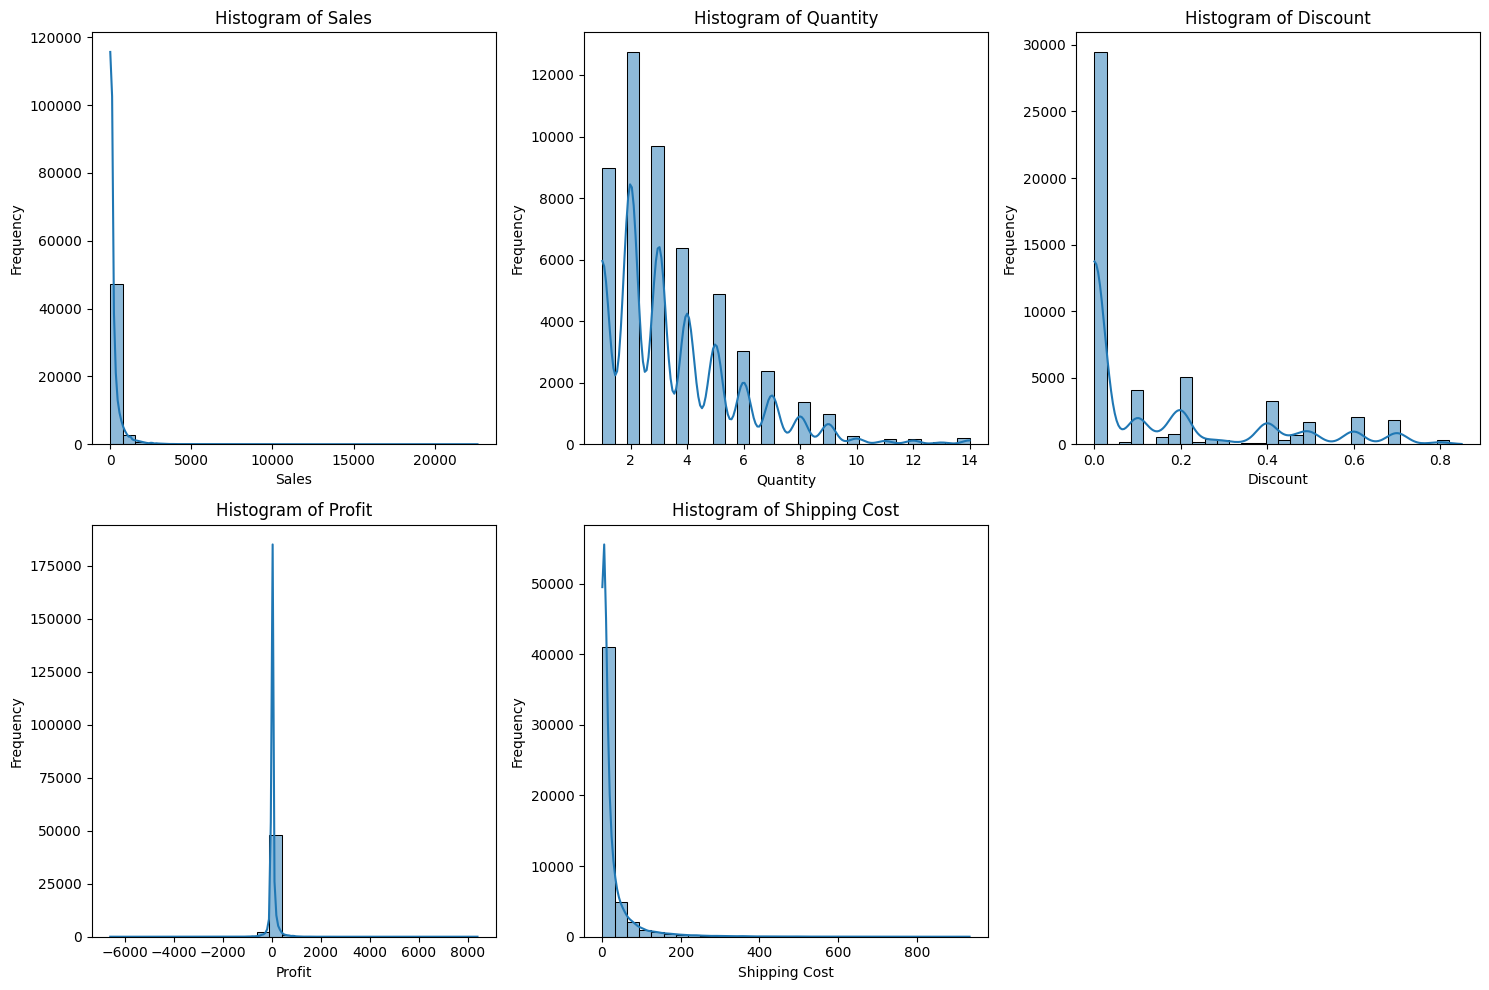

In [46]:
# Visualizing Continuous Numeric Fields
# Creating histograms and box plots for the following fields: Sales, Quantity, Discount, Profit, and Shipping Cost.

import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric fields to visualize
numeric_fields = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

# Create histograms
plt.figure(figsize=(15, 10))
for i, field in enumerate(numeric_fields, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=field, kde=True, bins=30)
    plt.title(f'Histogram of {field}')
    plt.xlabel(field)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


`Sales`: The distribution of sales is right-skewed, indicating that most transactions have lower sales values, with a few high-value outliers.

`Quantity`: The quantity of items sold is concentrated around lower values, suggesting that customers typically purchase small quantities per order.

`Discount`: Most products have little to no discount, with a peak at 0%. Higher discounts are less common.

`Profit`: The profit distribution is roughly normal, with some negative values indicating losses on certain transactions.

`Shipping Cost`: Shipping costs are relatively low for most orders, with a few outliers suggesting higher shipping expenses for specific orders.

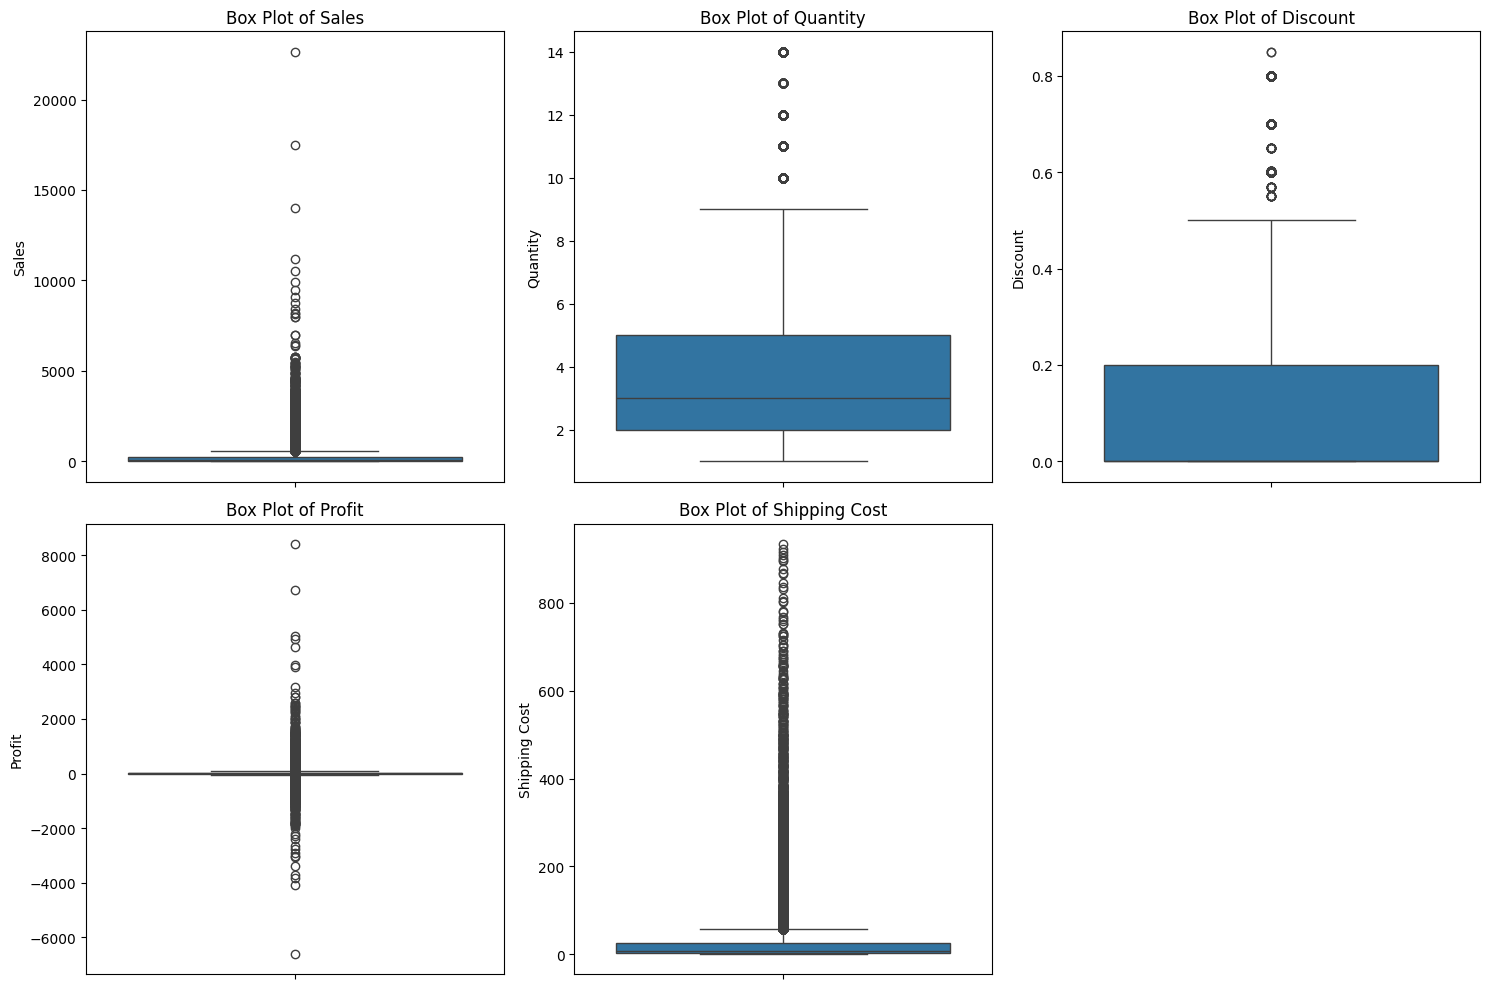

In [47]:
# Box Plots

# Create box plots
plt.figure(figsize=(15, 10))
for i, field in enumerate(numeric_fields, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=field)
    plt.title(f'Box Plot of {field}')
    plt.ylabel(field)
plt.tight_layout()
plt.show()

`Sales`: The box plot shows many outliers on the higher end, indicating a few transactions with exceptionally high sales.

`Quantity`: The interquartile range (IQR) is narrow, with most orders having quantities between 2 and 5 items.

`Discount`: The majority of discounts are below 20%, with a few extreme outliers at higher discount levels.

`Profit`: The presence of negative profit values indicates some unprofitable transactions. The IQR shows that most profits are modest.

`Shipping Cost`: Shipping costs are tightly clustered, with a few outliers suggesting higher costs for specific orders.

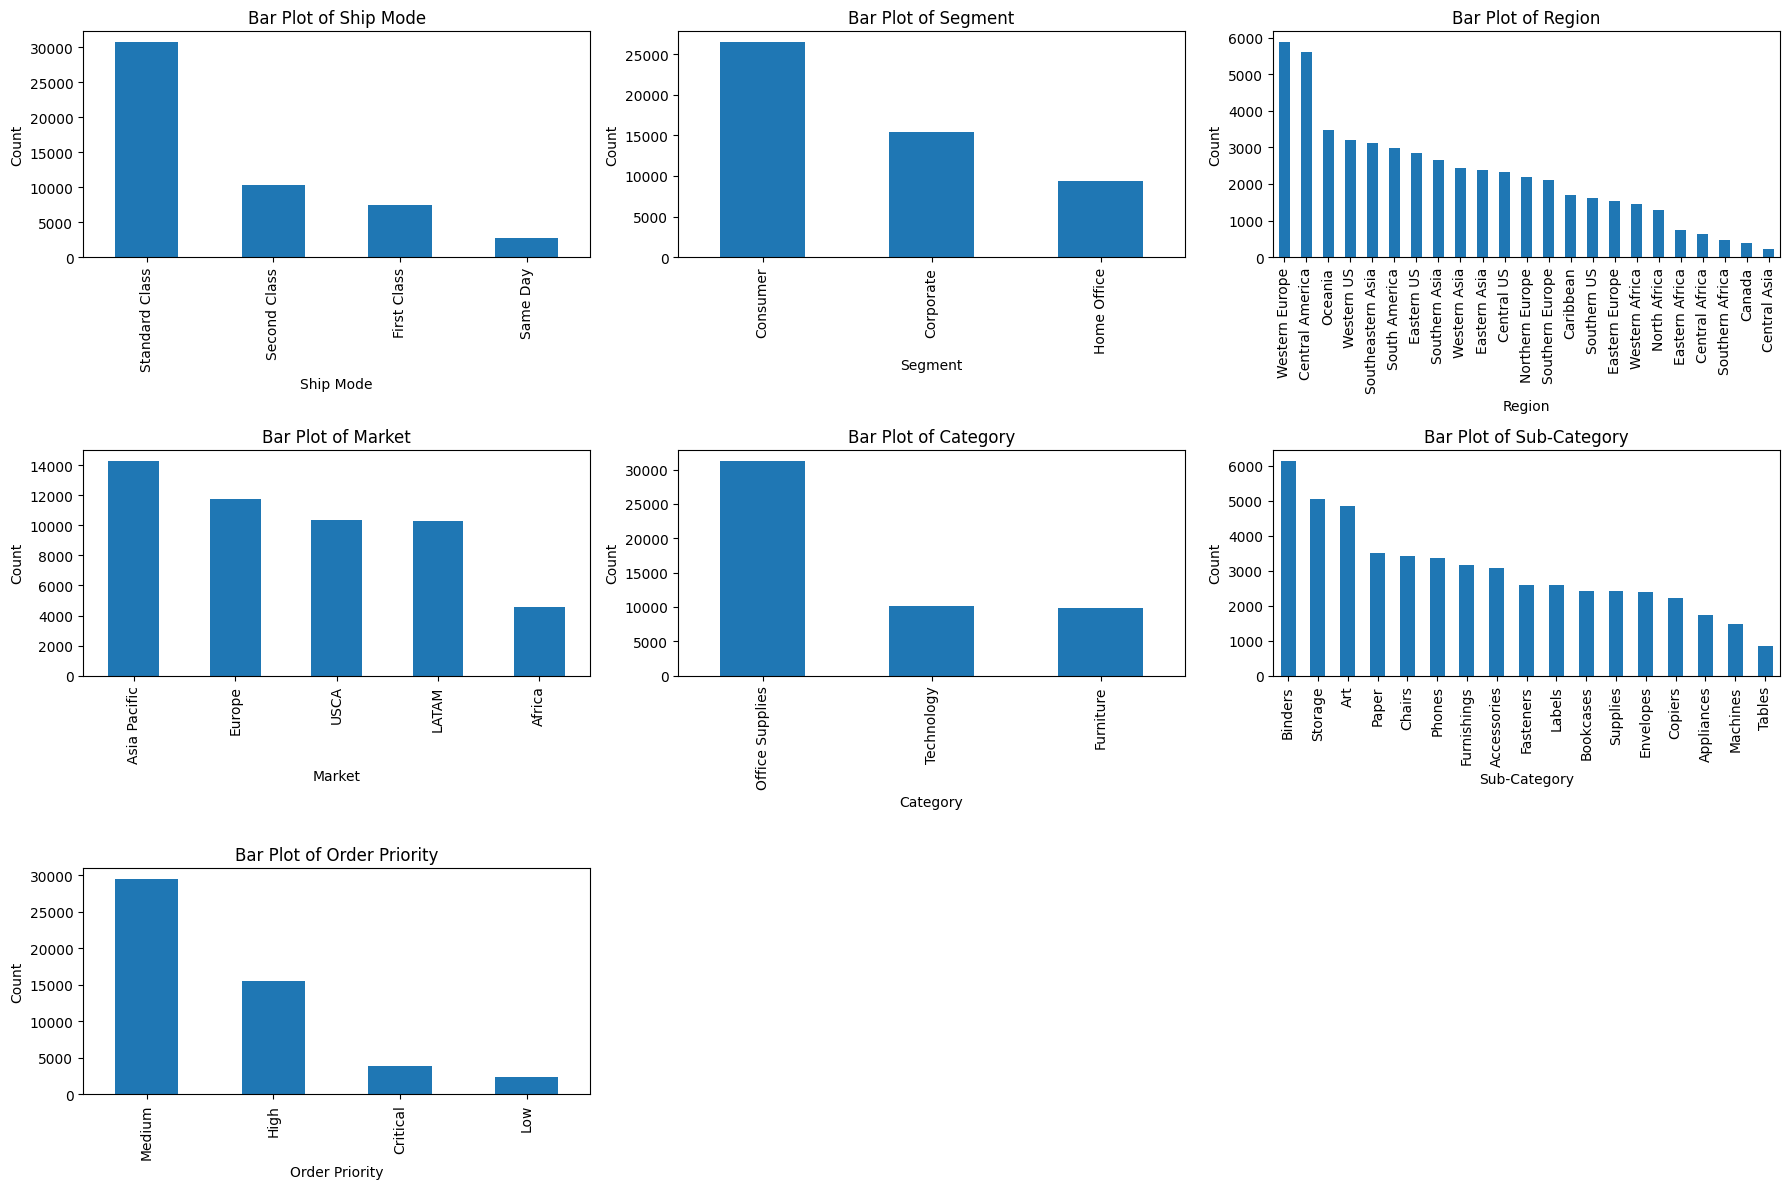

In [48]:
# Visualizing Categorical Fields
# Creating bar plots and horizontal bar plots for : Ship Mode, Segment, Region, Market, Category, Sub-Category, and Order Priority.

# List of categorical fields to visualize
categorical_fields = ['Ship Mode', 'Segment', 'Region', 'Market', 'Category', 'Sub-Category', 'Order Priority']

# Create bar plots
plt.figure(figsize=(18, 12))
for i, field in enumerate(categorical_fields, 1):
    plt.subplot(3, 3, i)
    df[field].value_counts().sort_values(ascending=False).plot(kind='bar')
    plt.title(f'Bar Plot of {field}')
    plt.xlabel(field)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

`Ship Mode`: Standard Class is the most frequently used shipping mode, followed by Second Class.

`Segment`: The Consumer segment dominates, followed by Corporate and Home Office.

`Region`: The West region has the highest number of orders, while the South has the lowest.

`Market`: The APAC market has the most orders, while Canada has the fewest.

`Category`: Office Supplies is the most popular category, followed by Furniture and Technology.

`Sub-Category`: Binders and Paper are the top-selling sub-categories.

`Order Priority`: Most orders have a "Medium" priority, with "Critical" being the least common.

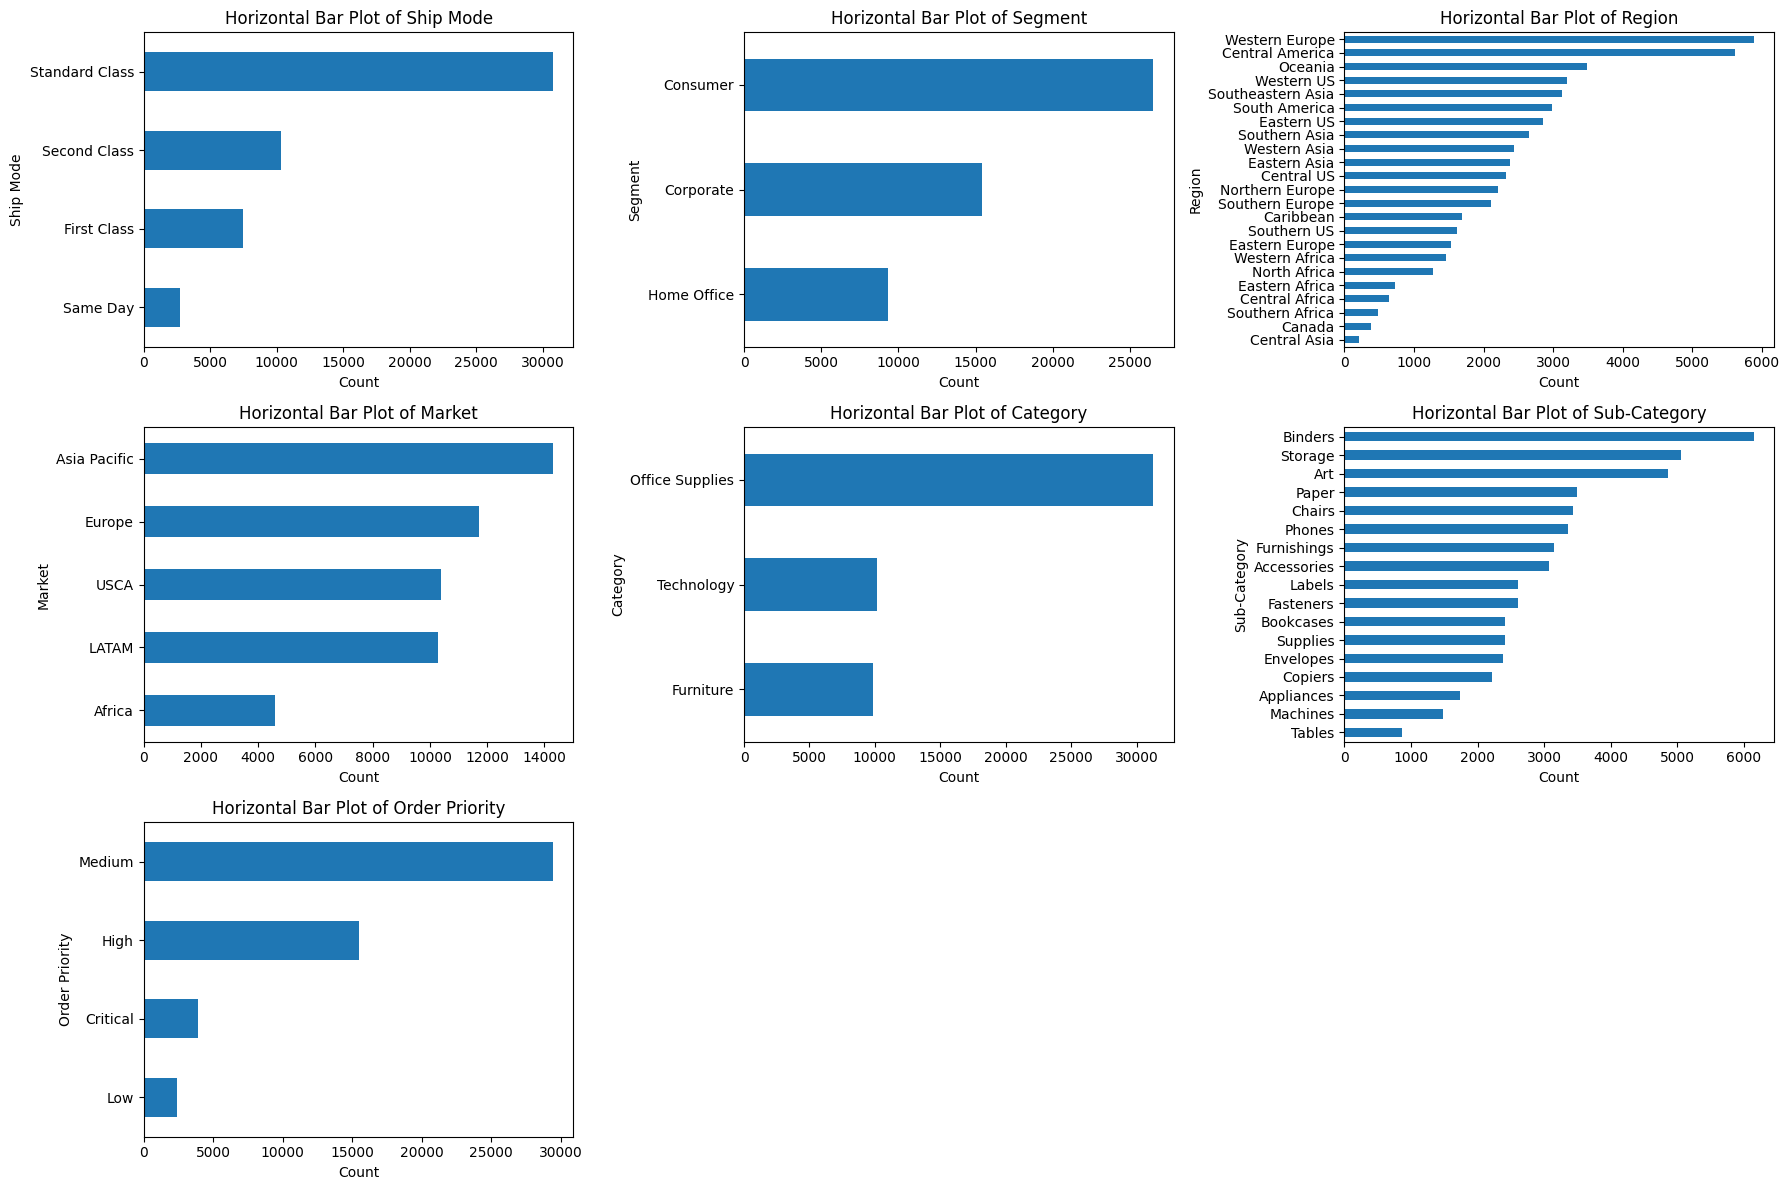

In [49]:
# Horizontal Bar Plots

# Create horizontal bar plots
plt.figure(figsize=(18, 12))
for i, field in enumerate(categorical_fields, 1):
    plt.subplot(3, 3, i)
    df[field].value_counts().sort_values().plot(kind='barh')
    plt.title(f'Horizontal Bar Plot of {field}')
    plt.xlabel('Count')
    plt.ylabel(field)
plt.tight_layout()
plt.show()

`Ship Mode`: Standard Class is the most common, while Same Day is the least used.

`Segment`: Consumers are the largest segment, while Home Office is the smallest.

`Region`: The West region leads in order volume, while the South trails behind.

`Market`: APAC is the largest market, and Canada is the smallest.

`Category`: Office Supplies dominate, while Technology lags slightly behind.

`Sub-Category`: Binders and Paper are the top performers, while Copiers are the least sold.

`Order Priority`: Medium priority orders are the most frequent, while Critical orders are rare.

## Relationship Between Sales & Profit  
Scatterplot to visualize how sales relate to profit.

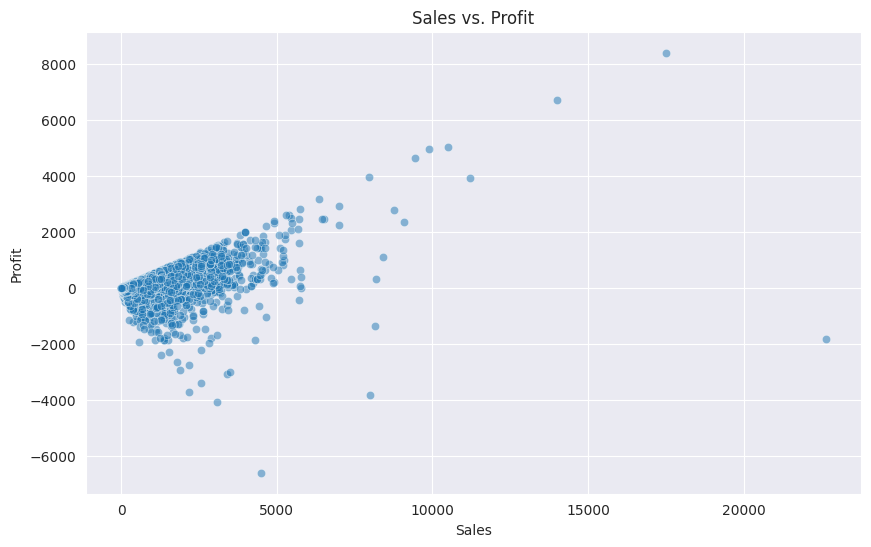

In [71]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Sales'], y=df['Profit'], alpha=0.5)
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


# Superstore Visualization Part 2: Bar Charts and Scientific Notation

In [50]:
# Set notebook defaults
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)  # Display numbers without scientific notation
pd.set_option('display.max_columns', None)  # Display all columns in a dataframe

`pd.set_option('display.float_format', '{:.2f}'.format)`: Ensures all numeric values are displayed with 2 decimal places and without scientific notation.

`pd.set_option('display.max_columns', None)`: Ensures all columns in a DataFrame are displayed when you print it.

Total Sales by Segment:
Segment
Consumer      6507949.42
Corporate     3824697.52
Home Office   2309854.97
Name: Sales, dtype: float64




<ipython-input-51-573a8faa2507>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_field.values, y=sales_by_field.index, palette='viridis')


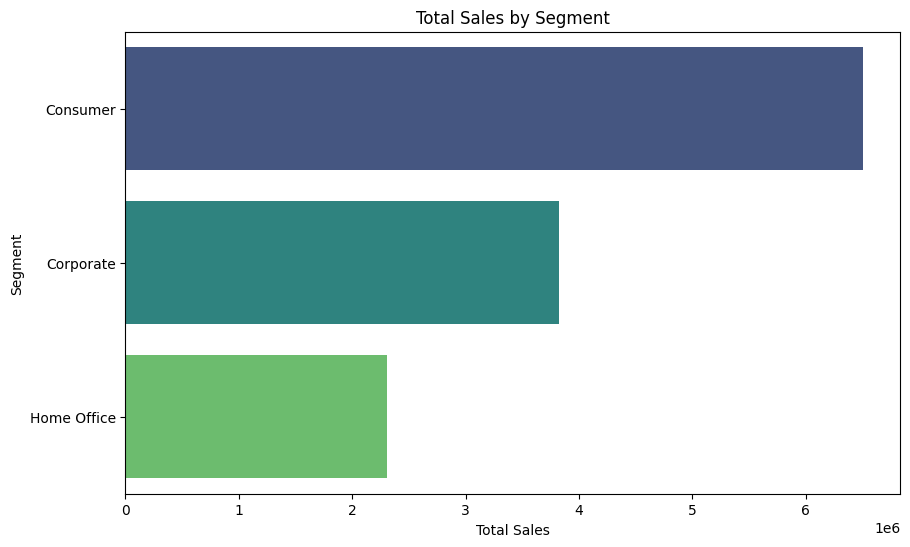

Total Sales by Region:
Region
Western Europe      1731929.67
Central America     1223100.63
Oceania             1100184.61
Southeastern Asia    884423.17
Southern Asia        866572.68
Eastern Asia         855059.39
Western US           725457.82
Eastern US           678781.24
Northern Europe      636779.16
South America        617223.68
Southern Europe      608593.97
Central US           501239.89
Southern US          391721.91
Caribbean            324280.86
Western Asia         317106.96
Eastern Europe       310033.44
North Africa         233216.61
Western Africa       173878.81
Central Africa       143630.01
Eastern Africa       127856.02
Southern Africa      105191.76
Canada                66928.17
Central Asia          19311.46
Name: Sales, dtype: float64




<ipython-input-51-573a8faa2507>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_field.values, y=sales_by_field.index, palette='viridis')


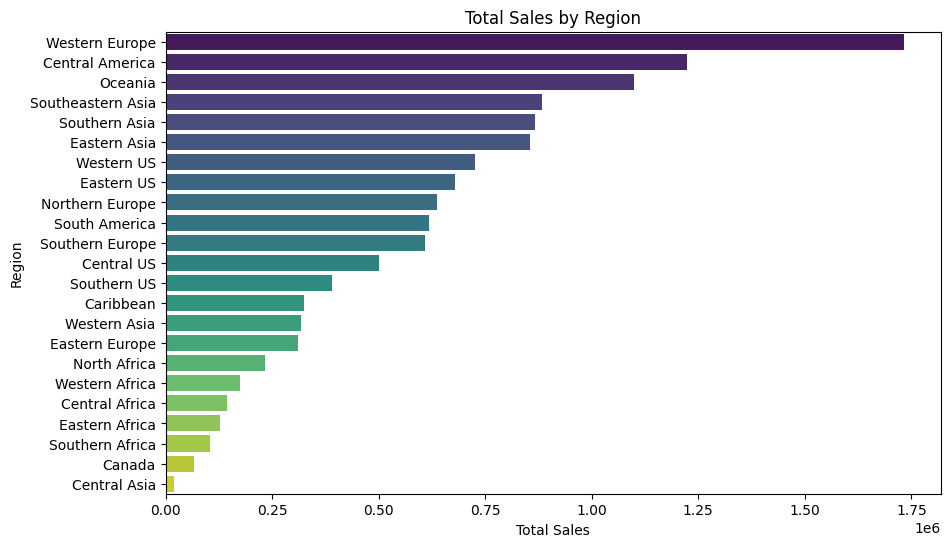

Total Sales by Market:
Market
Asia Pacific   4042658.27
Europe         3287336.23
USCA           2364129.03
LATAM          2164605.17
Africa          783773.21
Name: Sales, dtype: float64




<ipython-input-51-573a8faa2507>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_field.values, y=sales_by_field.index, palette='viridis')


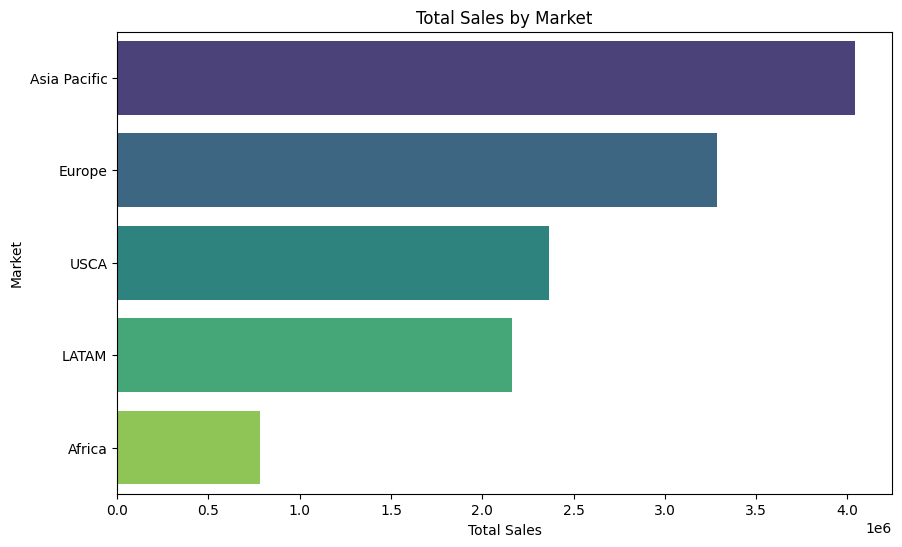

<ipython-input-51-573a8faa2507>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_field.values, y=sales_by_field.index, palette='viridis')


Total Sales by Category:
Category
Technology        4744557.50
Furniture         4110451.90
Office Supplies   3787492.51
Name: Sales, dtype: float64




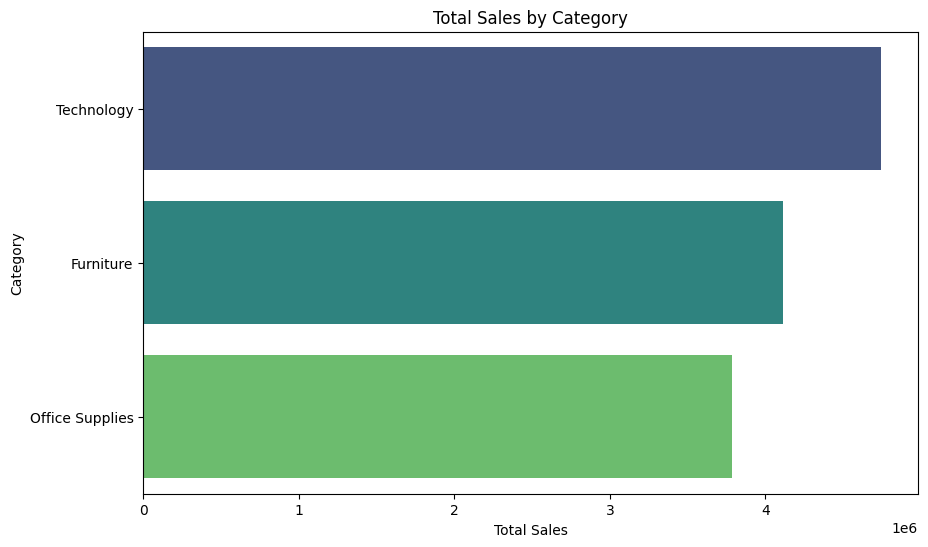

Total Sales by Sub-Category:
Sub-Category
Phones        1706824.14
Copiers       1509436.27
Chairs        1501681.76
Bookcases     1466572.24
Storage       1126812.97
Appliances    1010535.53
Machines       779060.07
Tables         757041.92
Accessories    749237.02
Binders        461869.39
Furnishings    385155.97
Art            371613.15
Supplies       242811.13
Paper          241787.53
Envelopes      169217.49
Fasteners       89495.05
Labels          73350.28
Name: Sales, dtype: float64




<ipython-input-51-573a8faa2507>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_field.values, y=sales_by_field.index, palette='viridis')


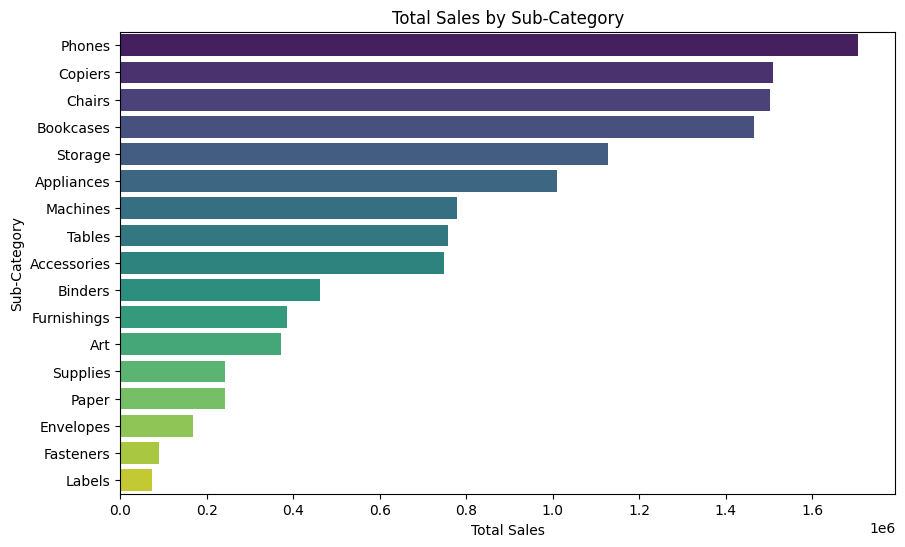

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical fields to analyze
categorical_fields = ['Segment', 'Region', 'Market', 'Category', 'Sub-Category']

# Create a numeric report and horizontal bar plot for each field
for field in categorical_fields:
    # Step 1: Create a numeric report (sum of Sales for each distinct value in the field)
    sales_by_field = df.groupby(field)['Sales'].sum().sort_values(ascending=False)
    print(f"Total Sales by {field}:")
    print(sales_by_field)
    print("\n")

    # Step 2: Create a horizontal bar plot
    plt.figure(figsize=(10, 6))

    # Adjust the figure size for better visualization
    sns.barplot(x=sales_by_field.values, y=sales_by_field.index, palette='viridis')
    plt.title(f'Total Sales by {field}')
    plt.xlabel('Total Sales')
    plt.ylabel(field)
    plt.show()

Numeric Report:

`df.groupby(field)['Sales'].sum().sort_values(ascending=False)`: Groups the data by the categorical field, sums the Sales for each group, and sorts the results in descending order.

The `print` statements display the numeric report.

`Horizontal Bar Plot`:

`plt.figure(figsize=(10, 6))`: Adjusts the size of the plot for better readability.

`sns.barplot()`: Creates a horizontal bar plot using Seaborn.

`palette='viridis'`: Uses a color palette for better visualization (you can change this to any other palette like 'coolwarm', 'magma', etc.).

# Superstore Visualization PART 3 Time Series

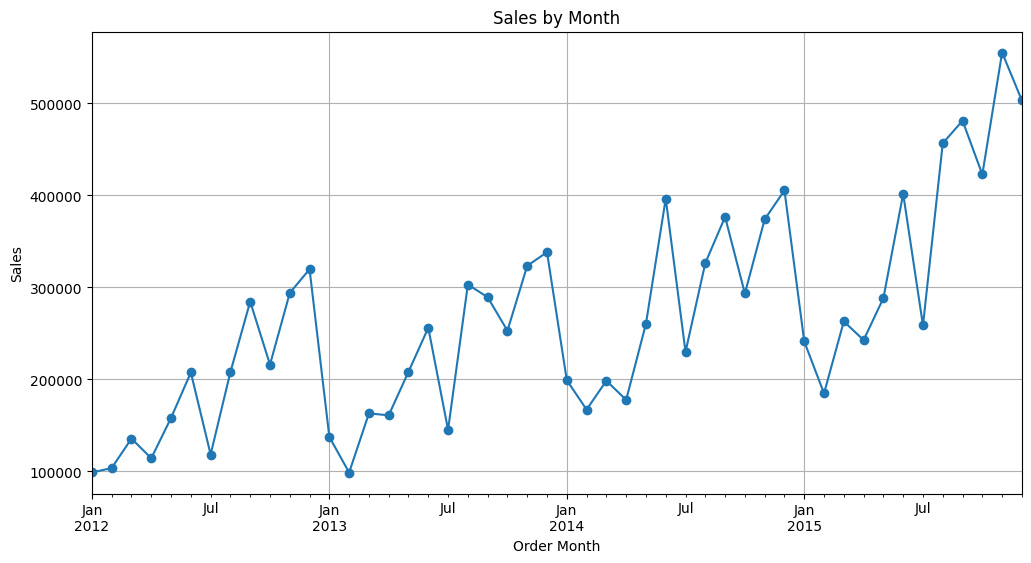

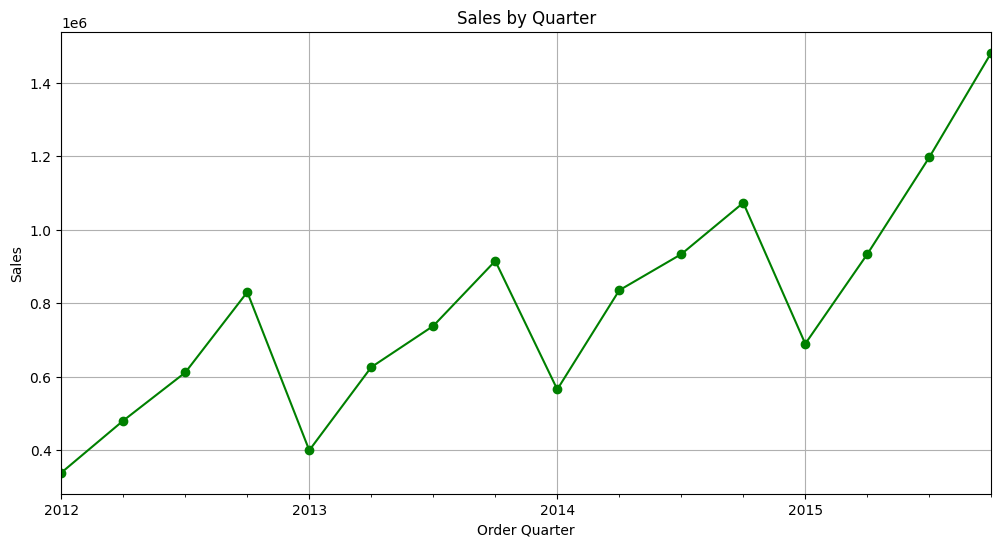

In [52]:
# Sales by Month & Quarter
# Using groupby with dt.to_period

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("/content/drive/MyDrive/DESCRIPTIVE ANALYTICS 25 Lee/Lees Python Foundations/SupStoreEDA/SupStoreData/Global_Superstore_Orders_2012_2015.xlsx", parse_dates=["Order Date"])

# Group by Month and Quarter
df["Order Month"] = df["Order Date"].dt.to_period("M")
df["Order Quarter"] = df["Order Date"].dt.to_period("Q")

sales_by_month = df.groupby("Order Month")["Sales"].sum()
sales_by_quarter = df.groupby("Order Quarter")["Sales"].sum()

# Plot Sales by Month
plt.figure(figsize=(12, 6))
sales_by_month.plot(marker="o", linestyle="-", title="Sales by Month")
plt.ylabel("Sales")
plt.grid()
plt.show()

# Plot Sales by Quarter
plt.figure(figsize=(12, 6))
sales_by_quarter.plot(marker="o", linestyle="-", title="Sales by Quarter", color="green")
plt.ylabel("Sales")
plt.grid()
plt.show()


<ipython-input-53-857e360302f9>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_by_month_resample = df["Sales"].resample("M").sum()
<ipython-input-53-857e360302f9>:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  sales_by_quarter_resample = df["Sales"].resample("Q").sum()


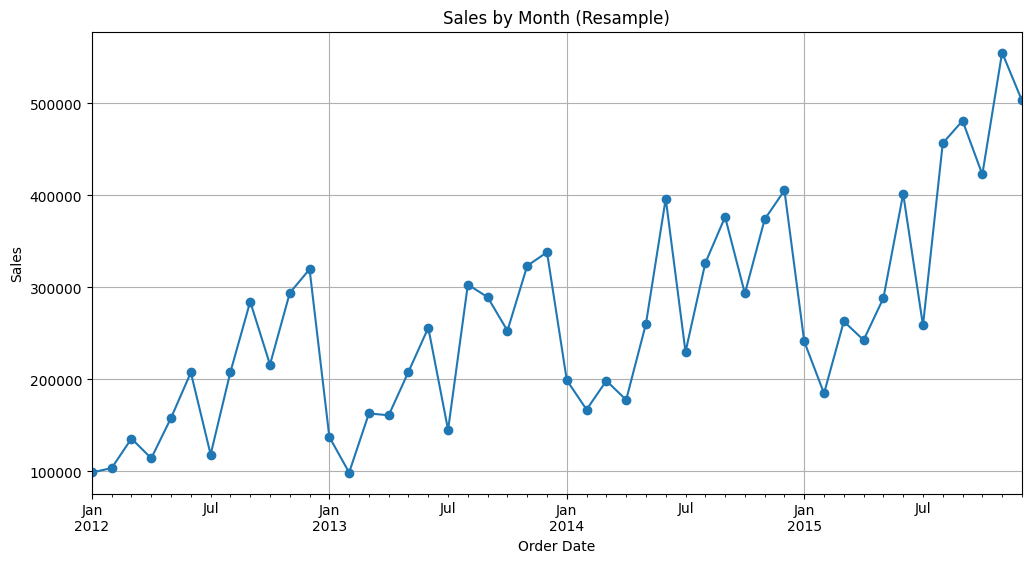

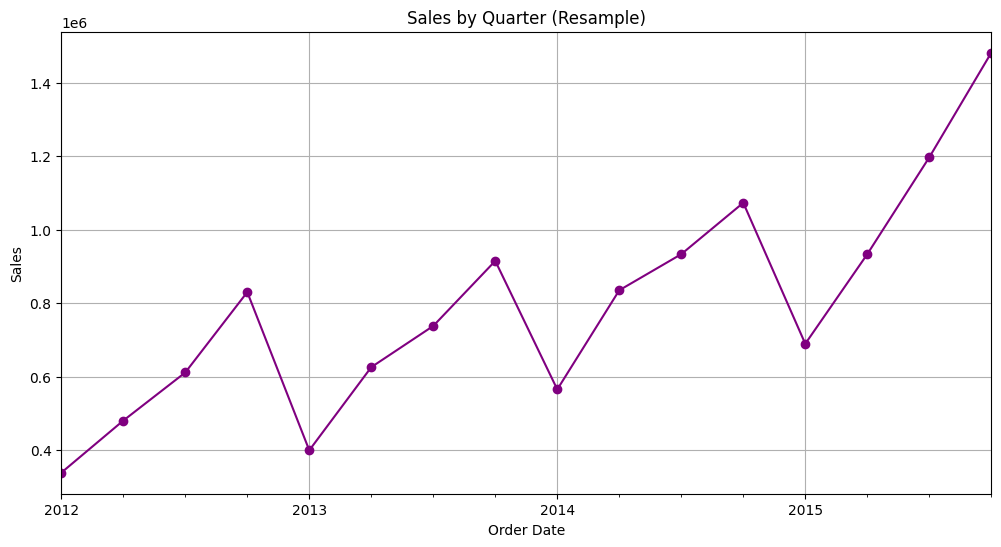

In [53]:
# Using Resample
# .resample("M") for monthly and .resample("Q") for quarterly aggregation.
# Ensure Date is the index
df.set_index("Order Date", inplace=True)

# Resample by Month and Quarter
sales_by_month_resample = df["Sales"].resample("M").sum()
sales_by_quarter_resample = df["Sales"].resample("Q").sum()

# Plot Sales by Month (resample)
plt.figure(figsize=(12, 6))
sales_by_month_resample.plot(marker="o", linestyle="-", title="Sales by Month (Resample)")
plt.ylabel("Sales")
plt.grid()
plt.show()

# Plot Sales by Quarter (resample)
plt.figure(figsize=(12, 6))
sales_by_quarter_resample.plot(marker="o", linestyle="-", title="Sales by Quarter (Resample)", color="purple")
plt.ylabel("Sales")
plt.grid()
plt.show()


# Profit by Month & Quarter (Using resample)

<ipython-input-54-cea90f98470f>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  profit_by_month_resample = df["Profit"].resample("M").sum()
<ipython-input-54-cea90f98470f>:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  profit_by_quarter_resample = df["Profit"].resample("Q").sum()


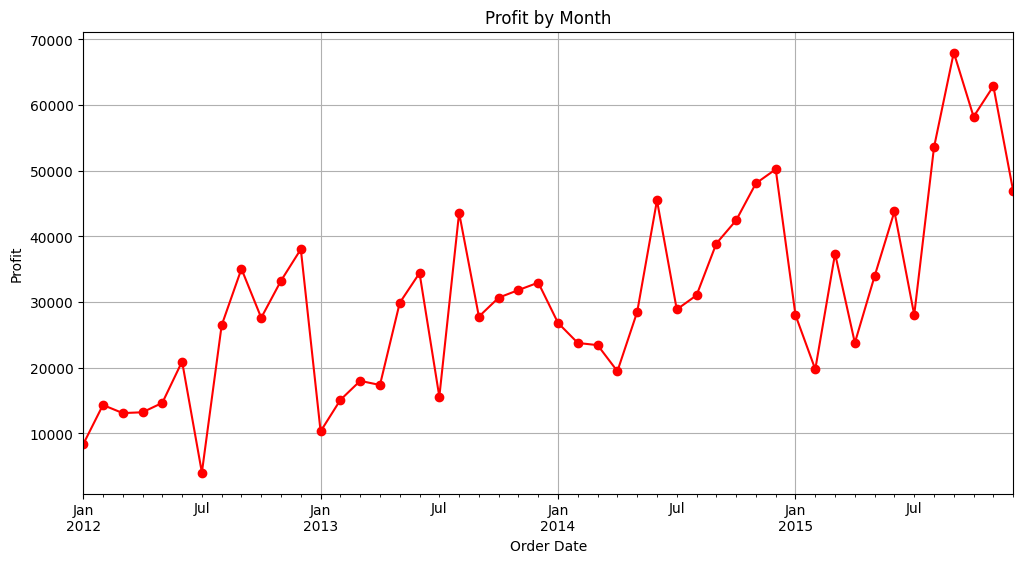

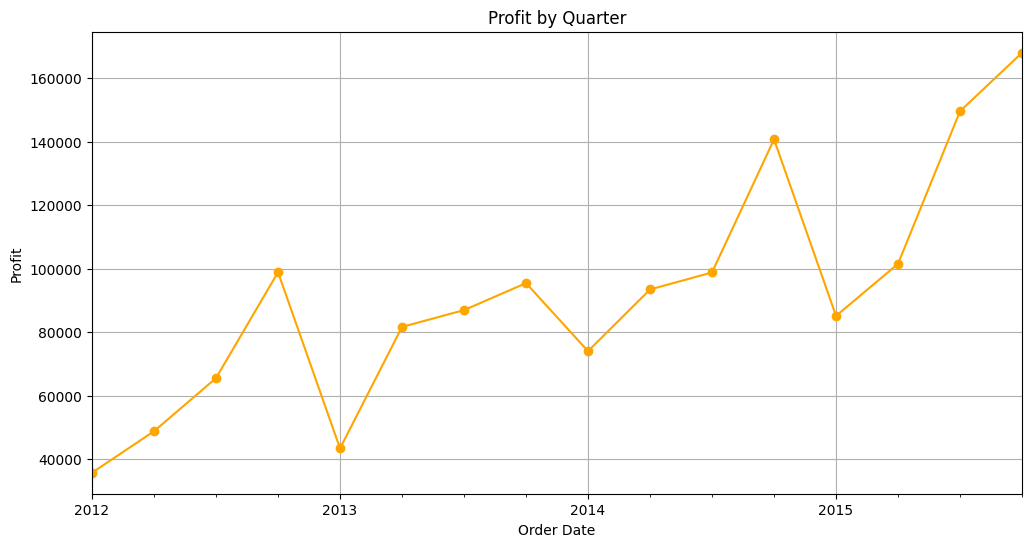

In [54]:
# Resample Profit by Month and Quarter
profit_by_month_resample = df["Profit"].resample("M").sum()
profit_by_quarter_resample = df["Profit"].resample("Q").sum()

# Plot Profit by Month
plt.figure(figsize=(12, 6))
profit_by_month_resample.plot(marker="o", linestyle="-", title="Profit by Month", color="red")
plt.ylabel("Profit")
plt.grid()
plt.show()

# Plot Profit by Quarter
plt.figure(figsize=(12, 6))
profit_by_quarter_resample.plot(marker="o", linestyle="-", title="Profit by Quarter", color="orange")
plt.ylabel("Profit")
plt.grid()
plt.show()


# Customizations and Innovations

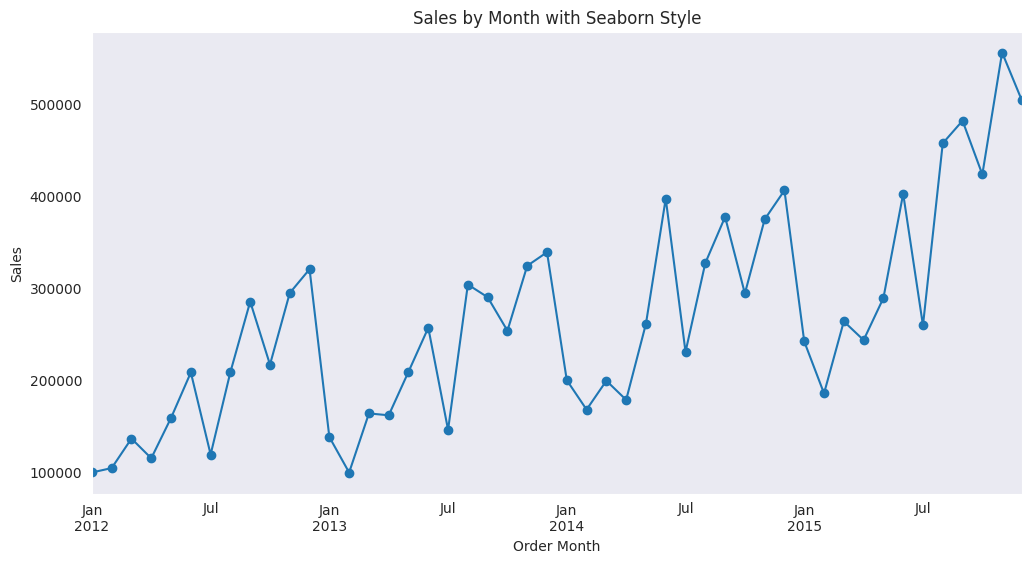

In [55]:
## Change Chart Styles

import seaborn as sns

sns.set_style("darkgrid")  # Options: whitegrid, darkgrid, white, dark, ticks

# Re-plot Sales by Month with new style
plt.figure(figsize=(12, 6))
sales_by_month.plot(marker="o", linestyle="-", title="Sales by Month with Seaborn Style")
plt.ylabel("Sales")
plt.grid()
plt.show()


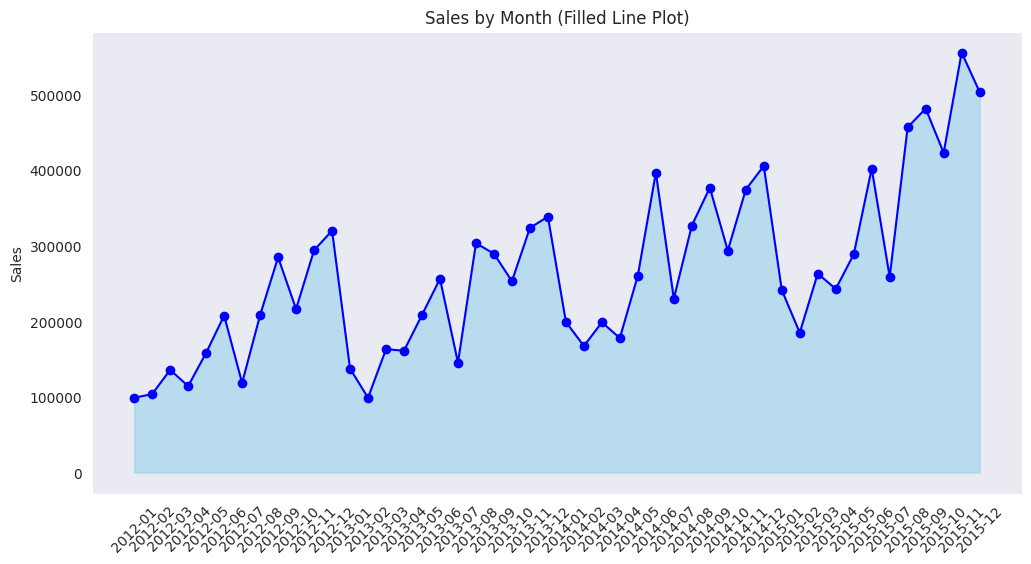

In [56]:
## Filled Line Plot

plt.figure(figsize=(12, 6))
plt.fill_between(sales_by_month.index.astype(str), sales_by_month.values, color="skyblue", alpha=0.5)
plt.plot(sales_by_month.index.astype(str), sales_by_month.values, marker="o", color="blue")
plt.title("Sales by Month (Filled Line Plot)")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid()
plt.show()



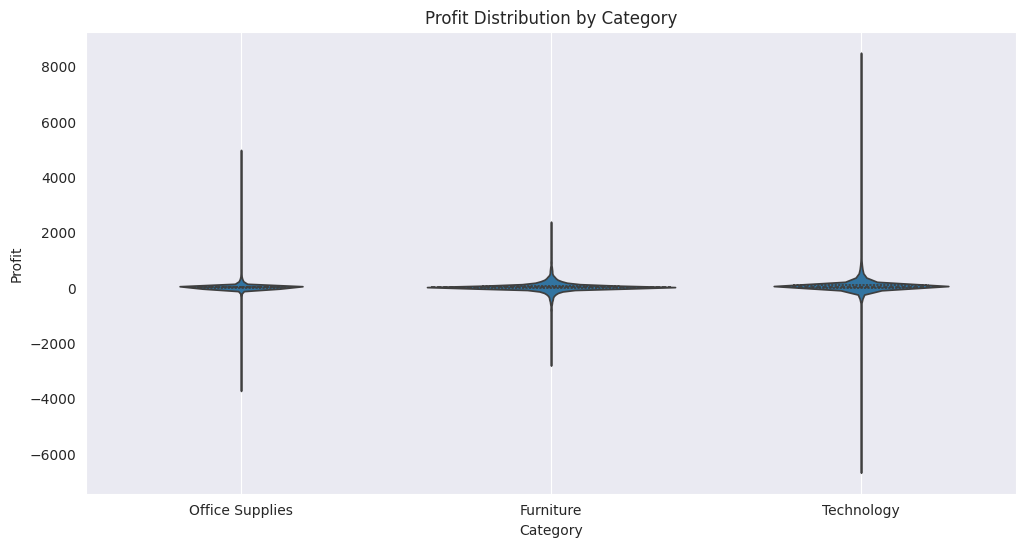

In [57]:
## Violin Plot
# For Profit Distribution by Category

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.violinplot(x="Category", y="Profit", data=df, inner="quartile")
plt.title("Profit Distribution by Category")
plt.grid()
plt.show()


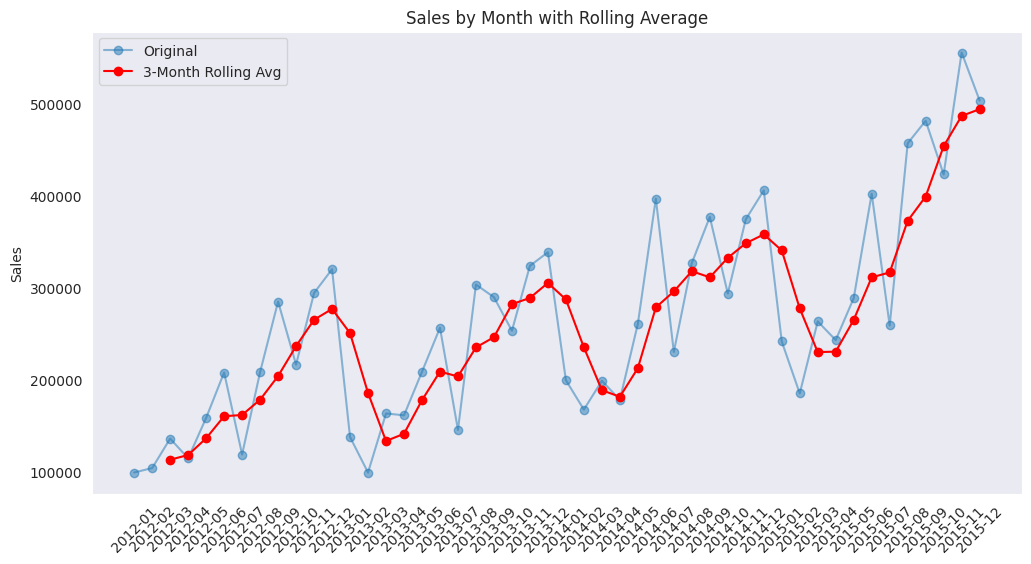

In [58]:
## Experiment: Using a Rolling Average
#We apply a rolling average to smooth out fluctuations in the data.

sales_by_month_rolling = sales_by_month.rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_month.index.astype(str), sales_by_month.values, marker="o", linestyle="-", alpha=0.5, label="Original")
plt.plot(sales_by_month.index.astype(str), sales_by_month_rolling, marker="o", linestyle="-", color="red", label="3-Month Rolling Avg")
plt.title("Sales by Month with Rolling Average")
plt.ylabel("Sales")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()



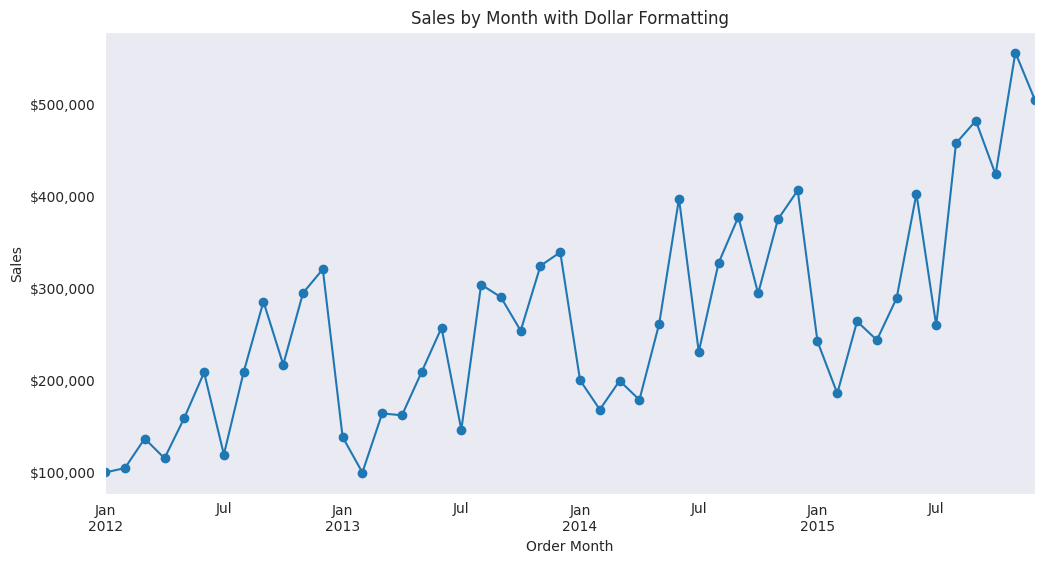

In [59]:
## Experiment: Adding Dollar Formatting to Sales and Profit Charts
# We enhance readability by formatting the y-axis to display dollar values.


import matplotlib.ticker as mtick

plt.figure(figsize=(12, 6))
sales_by_month.plot(marker="o", linestyle="-", title="Sales by Month with Dollar Formatting")
plt.ylabel("Sales")

# Format y-axis as currency
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter("${x:,.0f}"))
plt.grid()
plt.show()


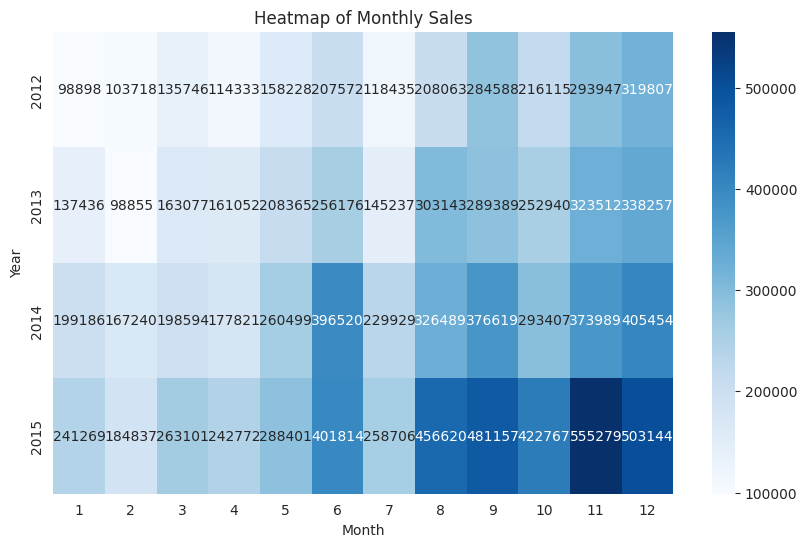

In [60]:
## Experiment 8: Heatmap of Monthly Sales
# A heatmap helps visualize sales trends across months and years.

df["Year"] = df.index.year
df["Month"] = df.index.month

sales_pivot = df.pivot_table(values="Sales", index="Year", columns="Month", aggfunc="sum")

plt.figure(figsize=(10, 6))
sns.heatmap(sales_pivot, cmap="Blues", annot=True, fmt=".0f")
plt.title("Heatmap of Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()



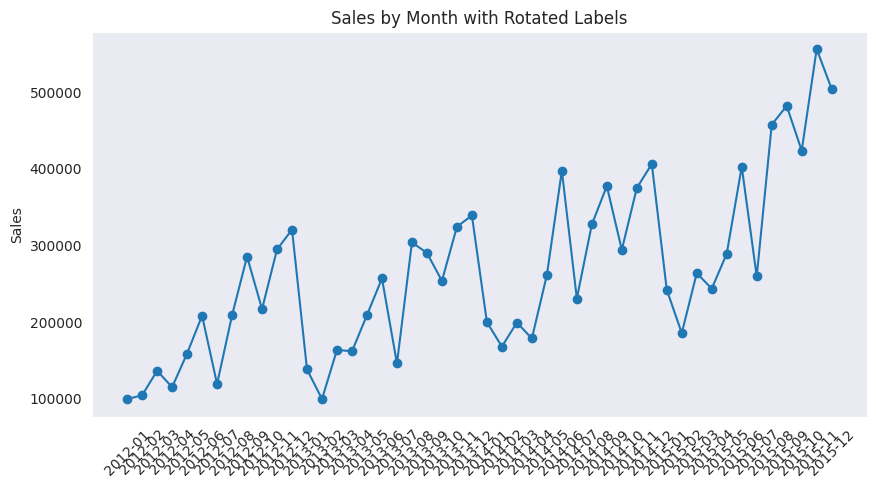

In [61]:
## Experiment 2: Rotating X-Axis Labels for Readability
# Long date labels can overlap. We rotate them to improve readability.

plt.figure(figsize=(10, 5))
plt.plot(sales_by_month.index.astype(str), sales_by_month.values, marker="o")
plt.title("Sales by Month with Rotated Labels")
plt.ylabel("Sales")
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.grid()
plt.show()




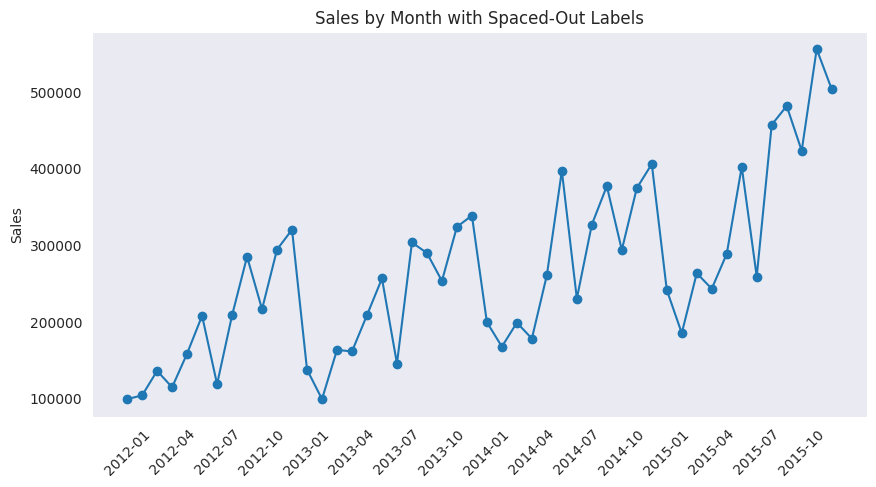

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(sales_by_month.index.astype(str), sales_by_month.values, marker="o")
plt.title("Sales by Month with Spaced-Out Labels")
plt.ylabel("Sales")

# Show only every 3rd month (adjust the step as needed)
plt.xticks(sales_by_month.index[::3].astype(str), rotation=45)

plt.grid()
plt.show()


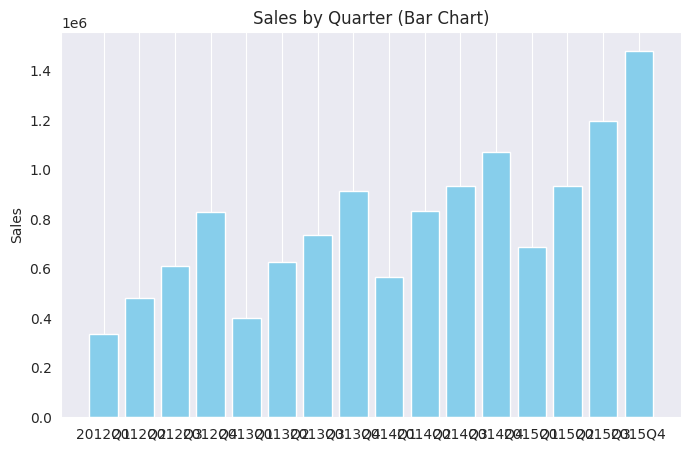

In [63]:
## Experiment 4: Adding a Simple Bar Chart for Sales by Quarter
# We display sales by quarter using a bar chart instead of a line chart.

plt.figure(figsize=(8, 5))
plt.bar(sales_by_quarter.index.astype(str), sales_by_quarter.values, color="skyblue")
plt.title("Sales by Quarter (Bar Chart)")
plt.ylabel("Sales")
plt.grid(axis="y")
plt.show()



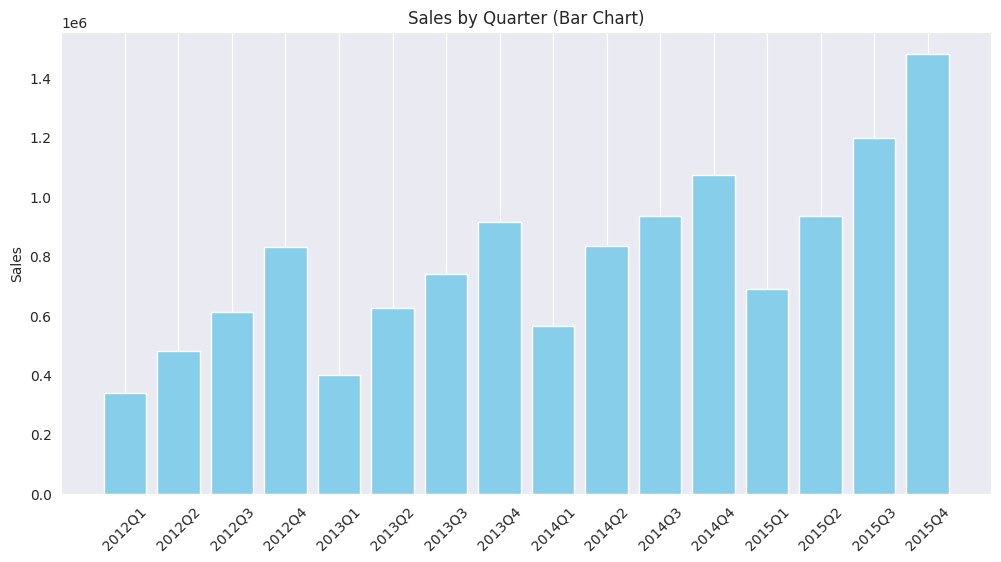

In [64]:
plt.figure(figsize=(12, 6))  # Increase width
plt.bar(sales_by_quarter.index.astype(str), sales_by_quarter.values, color="skyblue")
plt.title("Sales by Quarter (Bar Chart)")
plt.ylabel("Sales")
plt.grid(axis="y")

plt.xticks(rotation=45)  # Rotate for readability
plt.show()


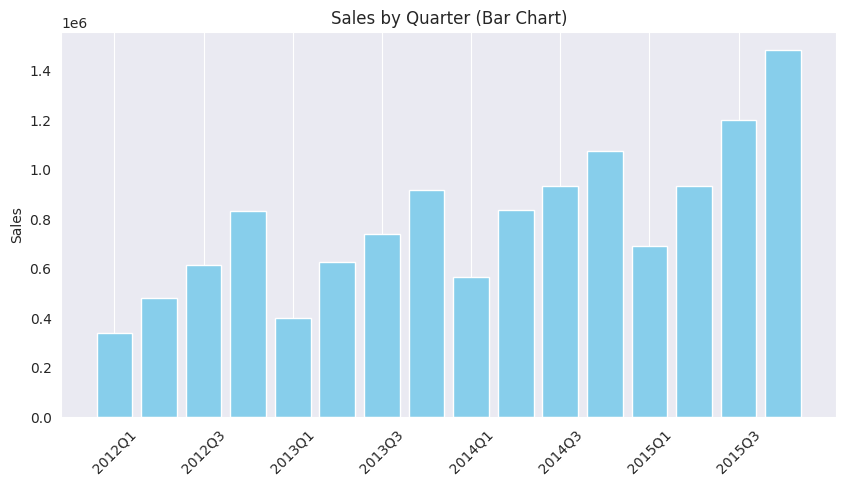

In [65]:
plt.figure(figsize=(10, 5))
plt.bar(sales_by_quarter.index.astype(str), sales_by_quarter.values, color="skyblue")
plt.title("Sales by Quarter (Bar Chart)")
plt.ylabel("Sales")
plt.grid(axis="y")

# Show only every other quarter (adjust as needed)
plt.xticks(sales_by_quarter.index[::2].astype(str), rotation=45)

plt.show()


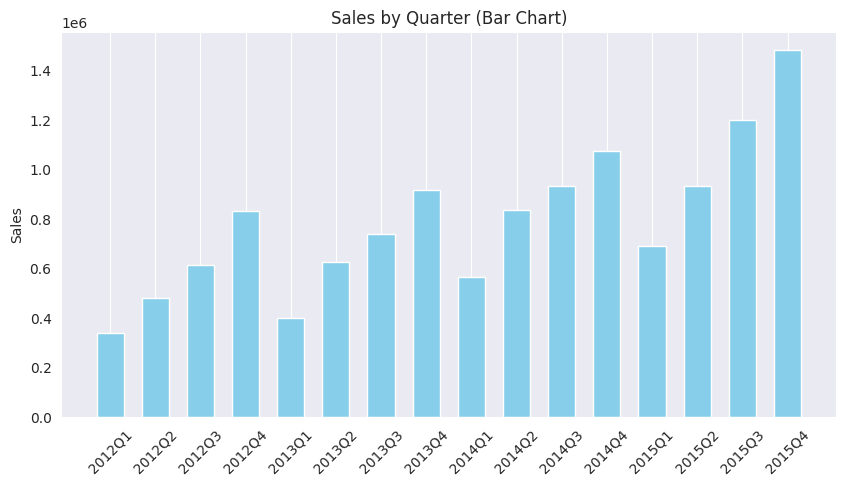

In [66]:
plt.figure(figsize=(10, 5))
plt.bar(sales_by_quarter.index.astype(str), sales_by_quarter.values, color="skyblue", width=0.6)  # Reduce width
plt.title("Sales by Quarter (Bar Chart)")
plt.ylabel("Sales")
plt.grid(axis="y")

plt.xticks(rotation=45)
plt.show()


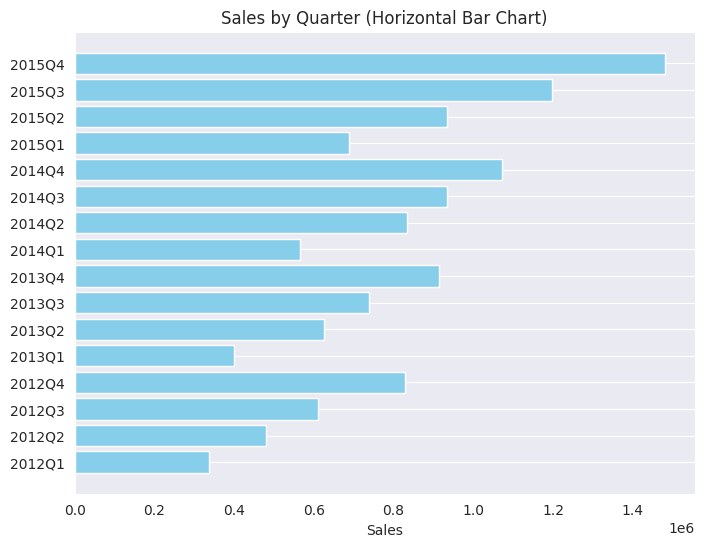

In [67]:
plt.figure(figsize=(8, 6))
plt.barh(sales_by_quarter.index.astype(str), sales_by_quarter.values, color="skyblue")
plt.title("Sales by Quarter (Horizontal Bar Chart)")
plt.xlabel("Sales")
plt.grid(axis="x")
plt.show()


# Conclusion  

### Key Findings  
- Sales are seasonal, with noticeable fluctuations over time.  
- High-discount orders often have **low or negative profits**.  
- The **Technology** category shows **higher profit margins** than Furniture.  

### Next Steps  
- Investigate whether specific **regions or customer segments** contribute to profit loss.  
- Optimize **discount strategies** to maintain profitability.  
- Analyze shipping costs to find cost-effective **logistics improvements**.  
